# IMPORTATION DES MODULES

In [1]:
import os
import sys
import pandas as pd # maths et stats
import seaborn as sns # visualisation de données

from numpy import * 
import numpy as np # manipulation de données
import matplotlib
import matplotlib.transforms as mtransforms
from matplotlib.transforms import offset_copy
from matplotlib.ticker import NullFormatter 
import matplotlib.pyplot as plt 
import datetime

import json # Pour transformer csv en json

#----------- MACHINE LEARNING -----------#
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn import linear_model

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

import math

from sklearn.model_selection import GridSearchCV

# OUVERTURE DES FICHIERS

In [2]:
bikes_share = pd.read_csv("bikeshare.csv", header = 0, delimiter =",", index_col = [0])
kaggle_test = pd.read_csv("test_bike_kaggle.csv", header = 0, delimiter =",", index_col = [0]) 

In [3]:
print("La dimension du data set est de :",bikes_share.shape)
print("La dimension du jeu de test de kaggle est de :",kaggle_test.shape)

('La dimension du data set est de :', (10886, 11))
('La dimension du jeu de test de kaggle est de :', (6493, 8))


In [4]:
print("-------------- data set ----------------")
bikes_share.head
print("-------------- Jeu de test de kaggle -----------------")
print(kaggle_test.head(5))

-------------- data set ----------------
-------------- Jeu de test de kaggle -----------------
                     season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

                     humidity  windspeed  
datetime                                  
2011-01-20 00:00:00        56    26.0027  
2011-01-20 01:00:00        56     0.0000  
2011-01-20 02:00:00        56     0.0000  
2011-01-20 03:00:00        56    11.0014  
2011-01-20 04:00:00        56    11.0014  


In [5]:
print("\nLe type de chaque colonne est :\n") 
bikes_share.info()


Le type de chaque colonne est :

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 2011/01/01 00:00:00 to 2012/12/19 23:00:00
Data columns (total 11 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8)
memory usage: 1020.6+ KB


# DESCRIPTION DU JEU DE DONNEES

In [6]:
print("Nous faisons la description du dataframe en enlevant les variables catégorielles")
bikes_share.iloc[:,3:].describe()

Nous faisons la description du dataframe en enlevant les variables catégorielles


weather         temp         atemp      humidity     windspeed  \
count  10886.000000  10886.00000  10886.000000  10886.000000  10886.000000   
mean       1.418427     20.23086     23.655084     61.886460     12.799395   
std        0.633839      7.79159      8.474601     19.245033      8.164537   
min        1.000000      0.82000      0.760000      0.000000      0.000000   
25%        1.000000     13.94000     16.665000     47.000000      7.001500   
50%        1.000000     20.50000     24.240000     62.000000     12.998000   
75%        2.000000     26.24000     31.060000     77.000000     16.997900   
max        4.000000     41.00000     45.455000    100.000000     56.996900   

             casual    registered         count  
count  10886.000000  10886.000000  10886.000000  
mean      36.021955    155.552177    191.574132  
std       49.960477    151.039033    181.144454  
min        0.000000      0.000000      1.000000  
25%        4.000000     36.000000     42.000000  
50%       17.000000    118.000000    145.000000  
75%       49.000000    222.000000    284.000000  
max      367.000000    886.000000    977.000000

In [7]:
kaggle_test.iloc[:,3:].describe()

weather         temp        atemp     humidity    windspeed
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000
mean      1.436778    20.620607    24.012865    64.125212    12.631157
std       0.648390     8.059583     8.782741    19.293391     8.250151
min       1.000000     0.820000     0.000000    16.000000     0.000000
25%       1.000000    13.940000    16.665000    49.000000     7.001500
50%       1.000000    21.320000    25.000000    65.000000    11.001400
75%       2.000000    27.060000    31.060000    81.000000    16.997900
max       4.000000    40.180000    50.000000   100.000000    55.998600

## Histogramme des variables prédictrices

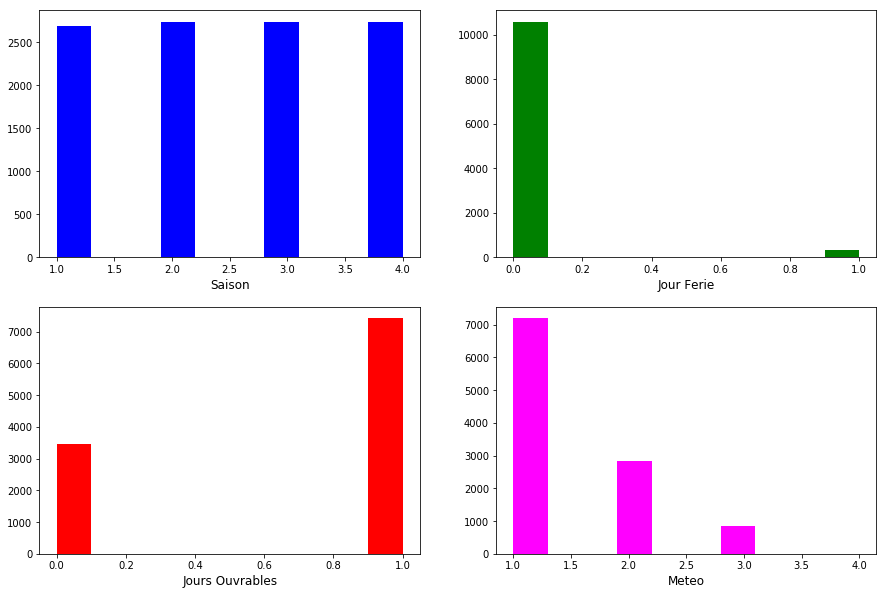

In [8]:
fig = plt.figure(figsize=(15, 10))
plt.figure(1)

plt.subplot(221)
plt.hist(bikes_share["season"], color='blue')
plt.xlabel('Saison', size=12)
#---------------------------------------------------------
plt.subplot(222)
plt.hist(bikes_share["holiday"], color='green')
plt.xlabel('Jour Ferie', size=12)

#--------------------------------------------------------
plt.subplot(223)
plt.hist(bikes_share["workingday"], color='red')
plt.xlabel('Jours Ouvrables', size=12)
#-------------------------------------------------------
plt.subplot(224)
plt.hist(bikes_share["weather"], color='magenta')
plt.xlabel('Meteo', size=12)

plt.show()

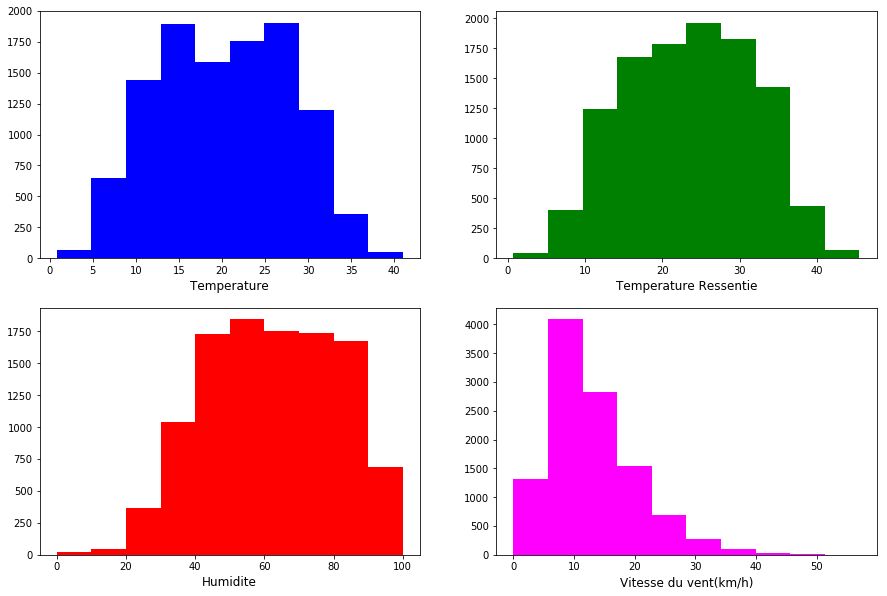

In [9]:
fig = plt.figure(figsize=(15, 10))
plt.figure(1)

plt.subplot(221)
plt.hist(bikes_share["temp"], color='blue')
plt.xlabel('Temperature', size=12)

plt.subplot(222)
plt.hist(bikes_share["atemp"], color='green')
plt.xlabel('Temperature Ressentie', size=12)

plt.subplot(223)
plt.hist(bikes_share["humidity"], color='red')
plt.xlabel('Humidite', size=12)

plt.subplot(224)
plt.hist(bikes_share["windspeed"], color='magenta')
plt.xlabel('Vitesse du vent(km/h)', size=12)

plt.show()

## Histogramme des variables cibles

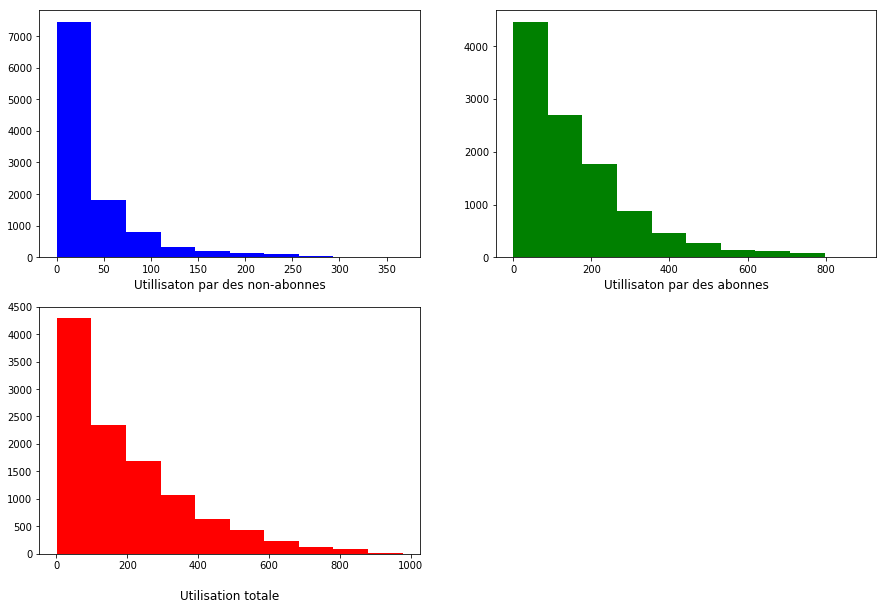

In [10]:
fig = plt.figure(figsize=(15, 10))
plt.figure(1)

plt.subplot(221)
plt.hist(bikes_share["casual"], color='blue')
plt.xlabel('Utillisaton par des non-abonnes', size=12)

plt.subplot(222)
plt.hist(bikes_share["registered"], color='green')
plt.xlabel('Utillisaton par des abonnes', size=12)

plt.subplot(223)
plt.hist(bikes_share["count"], color='red')
plt.xlabel('\nUtilisation totale', size=12)

plt.show()


# EXPLORATION DES DONNEES

## Analyse de corrélation croisée : variables continues

In [11]:
corr_var = bikes_share.iloc[:,3:8].corr()
corr_var

weather      temp     atemp  humidity  windspeed
weather    1.000000 -0.055035 -0.055376  0.406244   0.007261
temp      -0.055035  1.000000  0.984948 -0.064949  -0.017852
atemp     -0.055376  0.984948  1.000000 -0.043536  -0.057473
humidity   0.406244 -0.064949 -0.043536  1.000000  -0.318607
windspeed  0.007261 -0.017852 -0.057473 -0.318607   1.000000

## Image de la matrice de corrélation

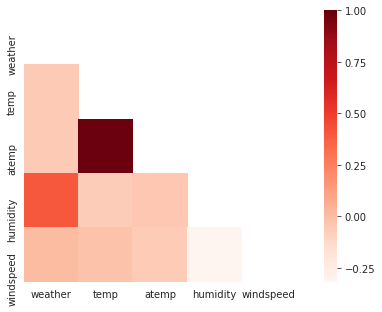

In [12]:
fig = plt.figure(figsize=(10, 5))
mask = np.zeros_like(corr_var)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):sns.heatmap(corr_var, mask=mask, square=True, cmap ="Reds")
plt.show()


## Interprétation : de la matrice de corrélation

> - Forte corrélation entre temp et atemp. Ce qui nous a permis ensuite d'éliminer l'une des deux.
> - Certaines variables sont corrélées négativement mais de façon très faible.


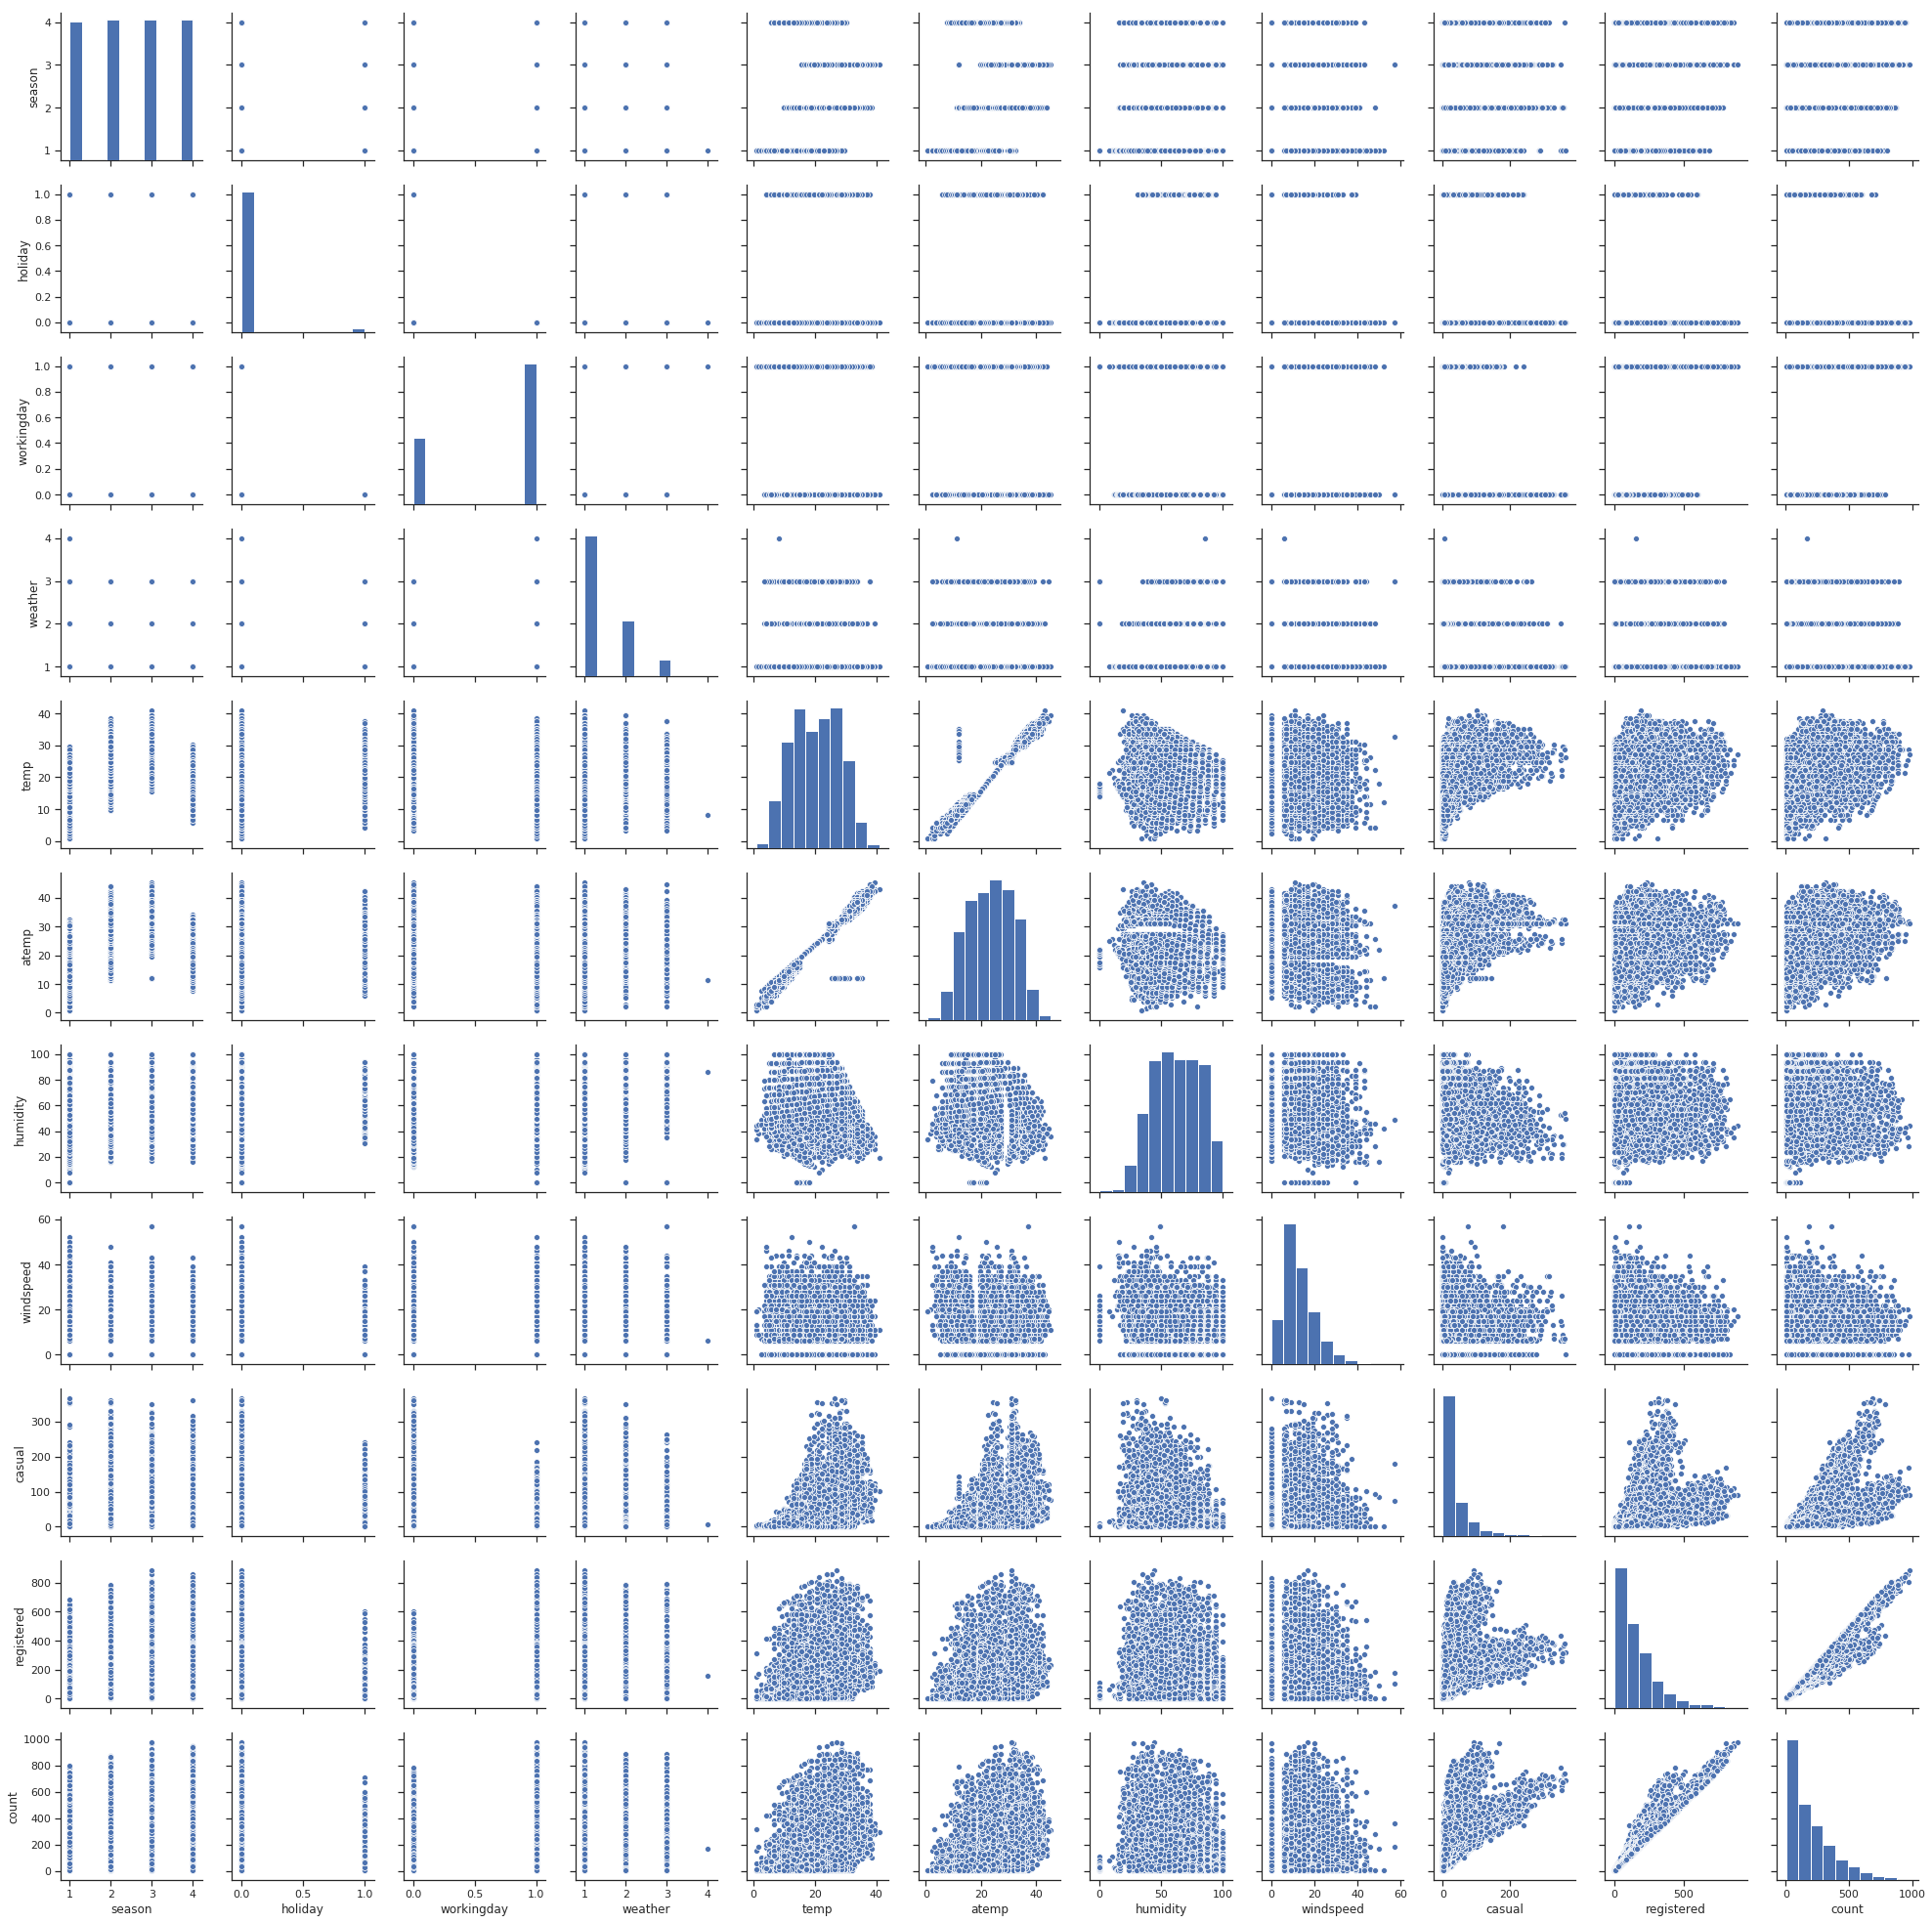

In [13]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(bikes_share)

/home/sidy/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/sidy/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/sidy/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/sidy/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2

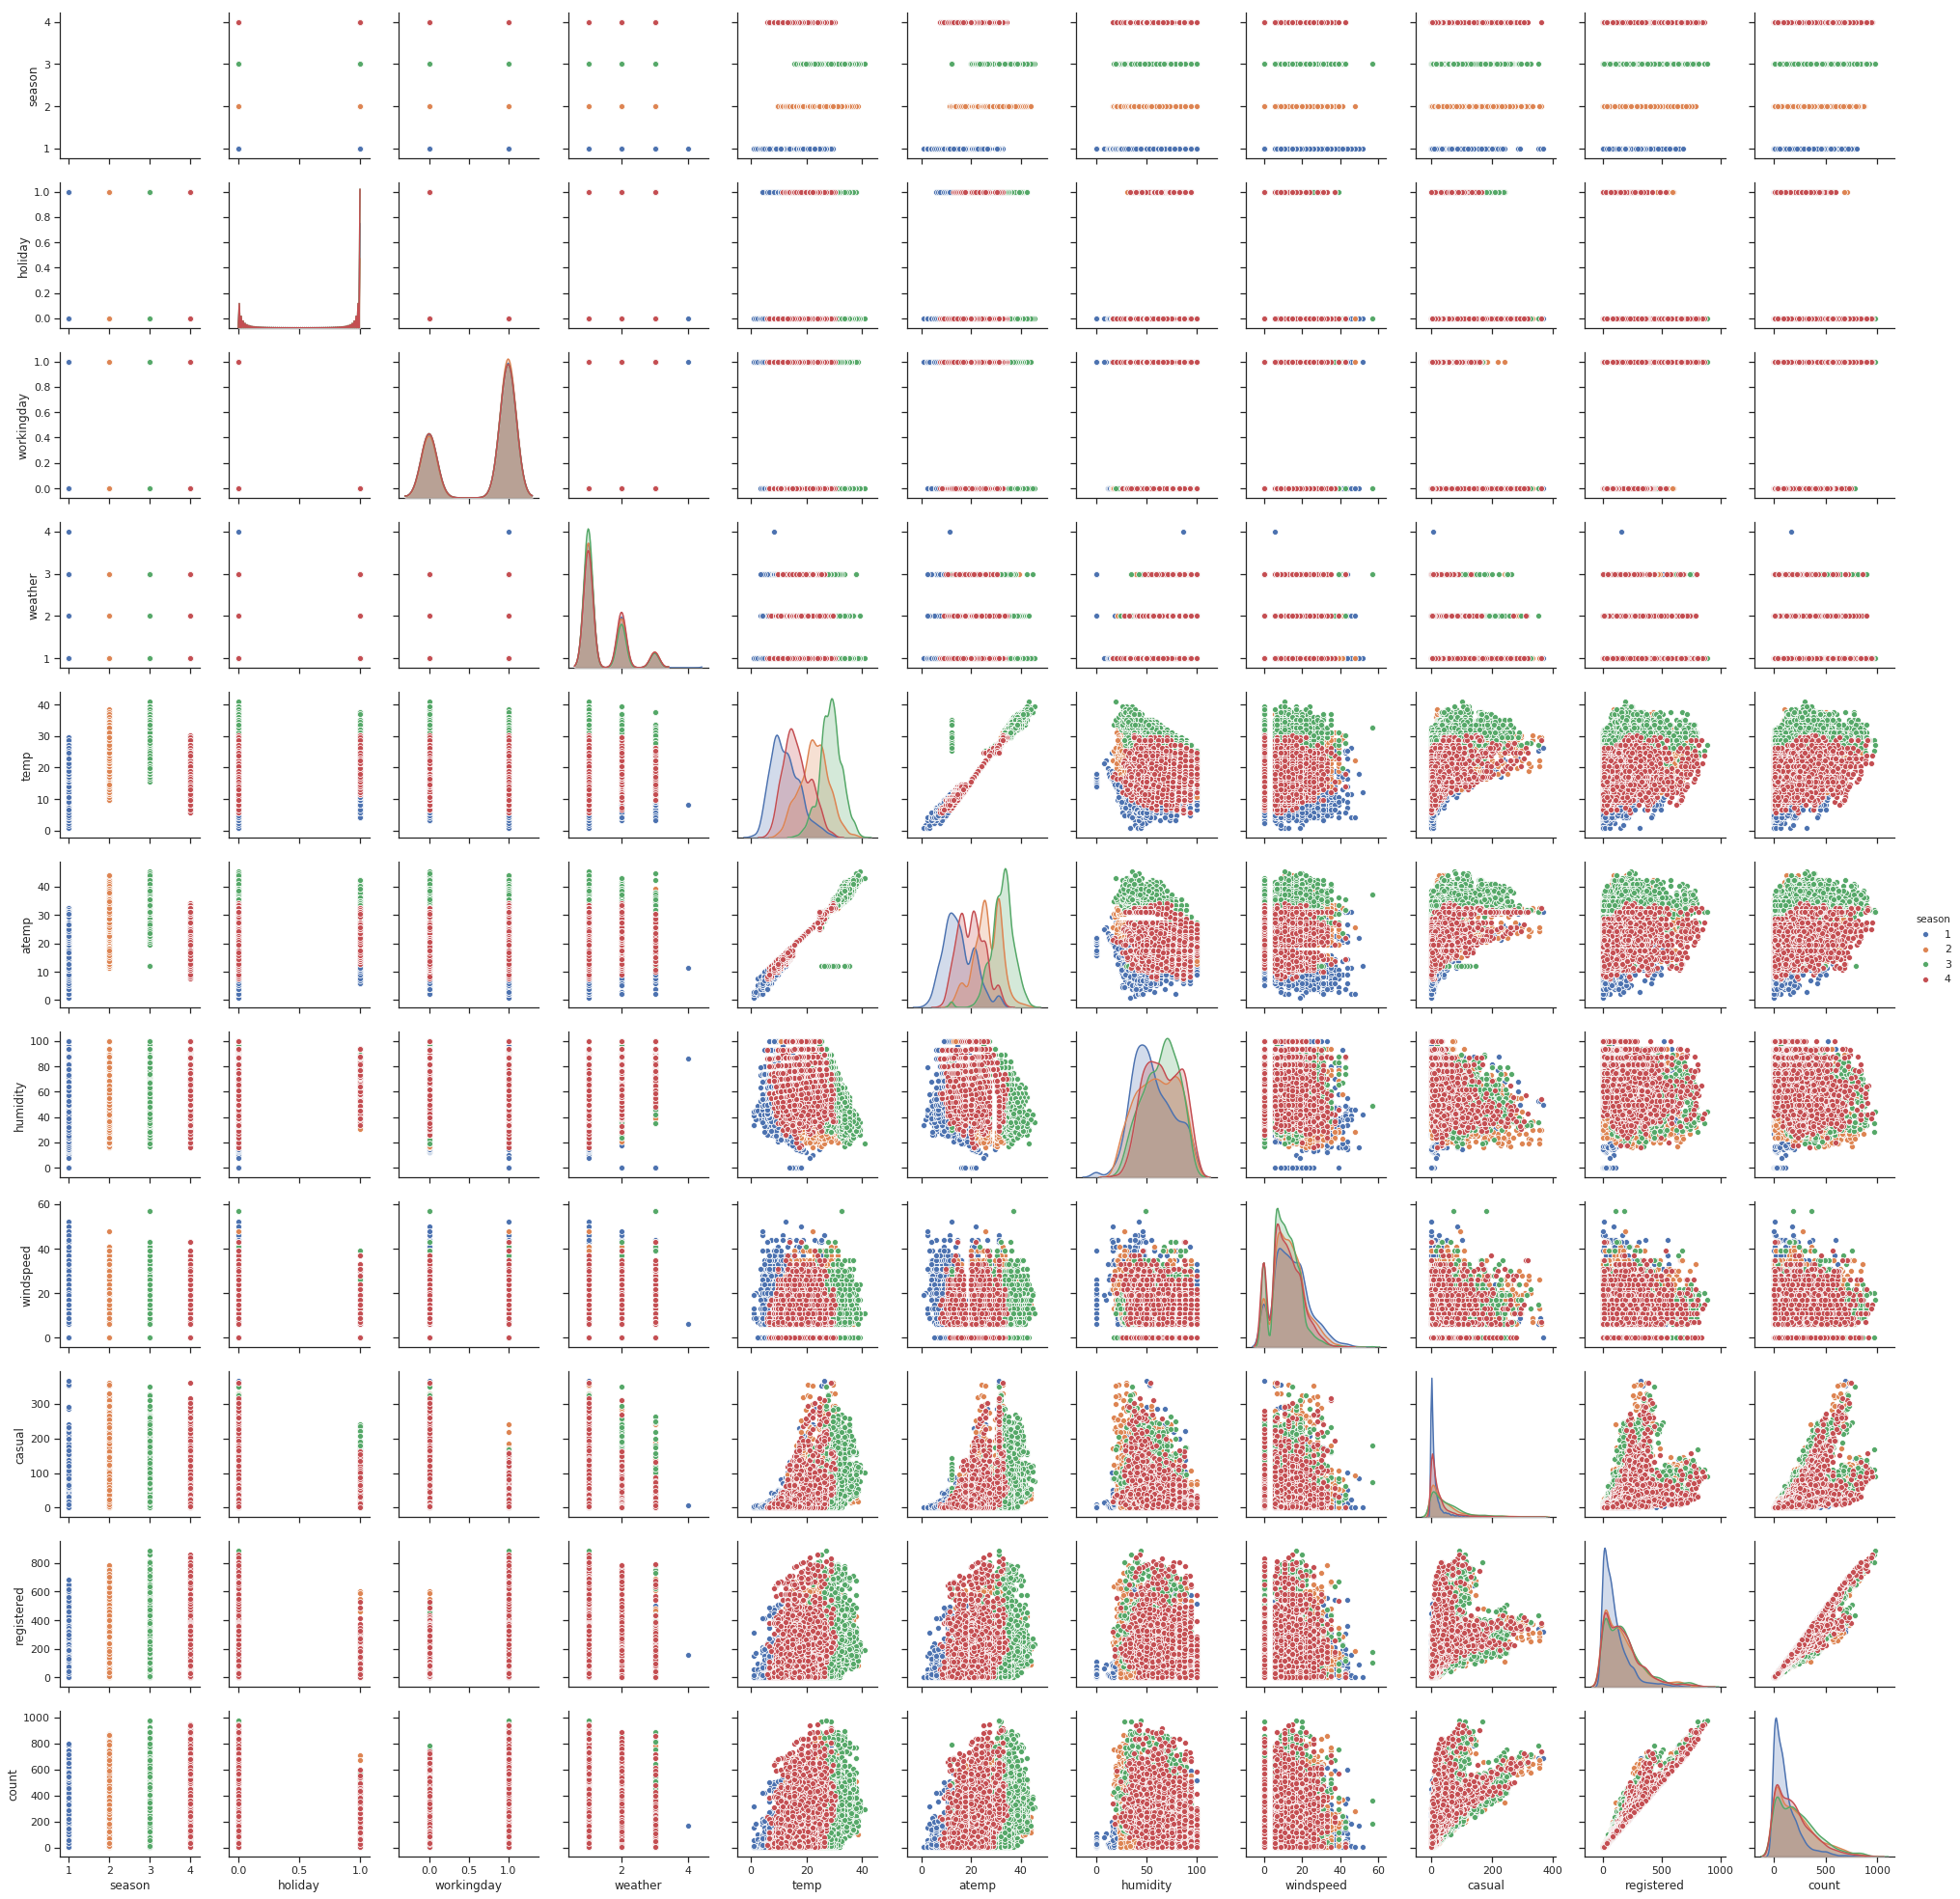

In [14]:
# classification par saison
sns.set(style="ticks", color_codes=True)
sns.pairplot(bikes_share, hue="season")

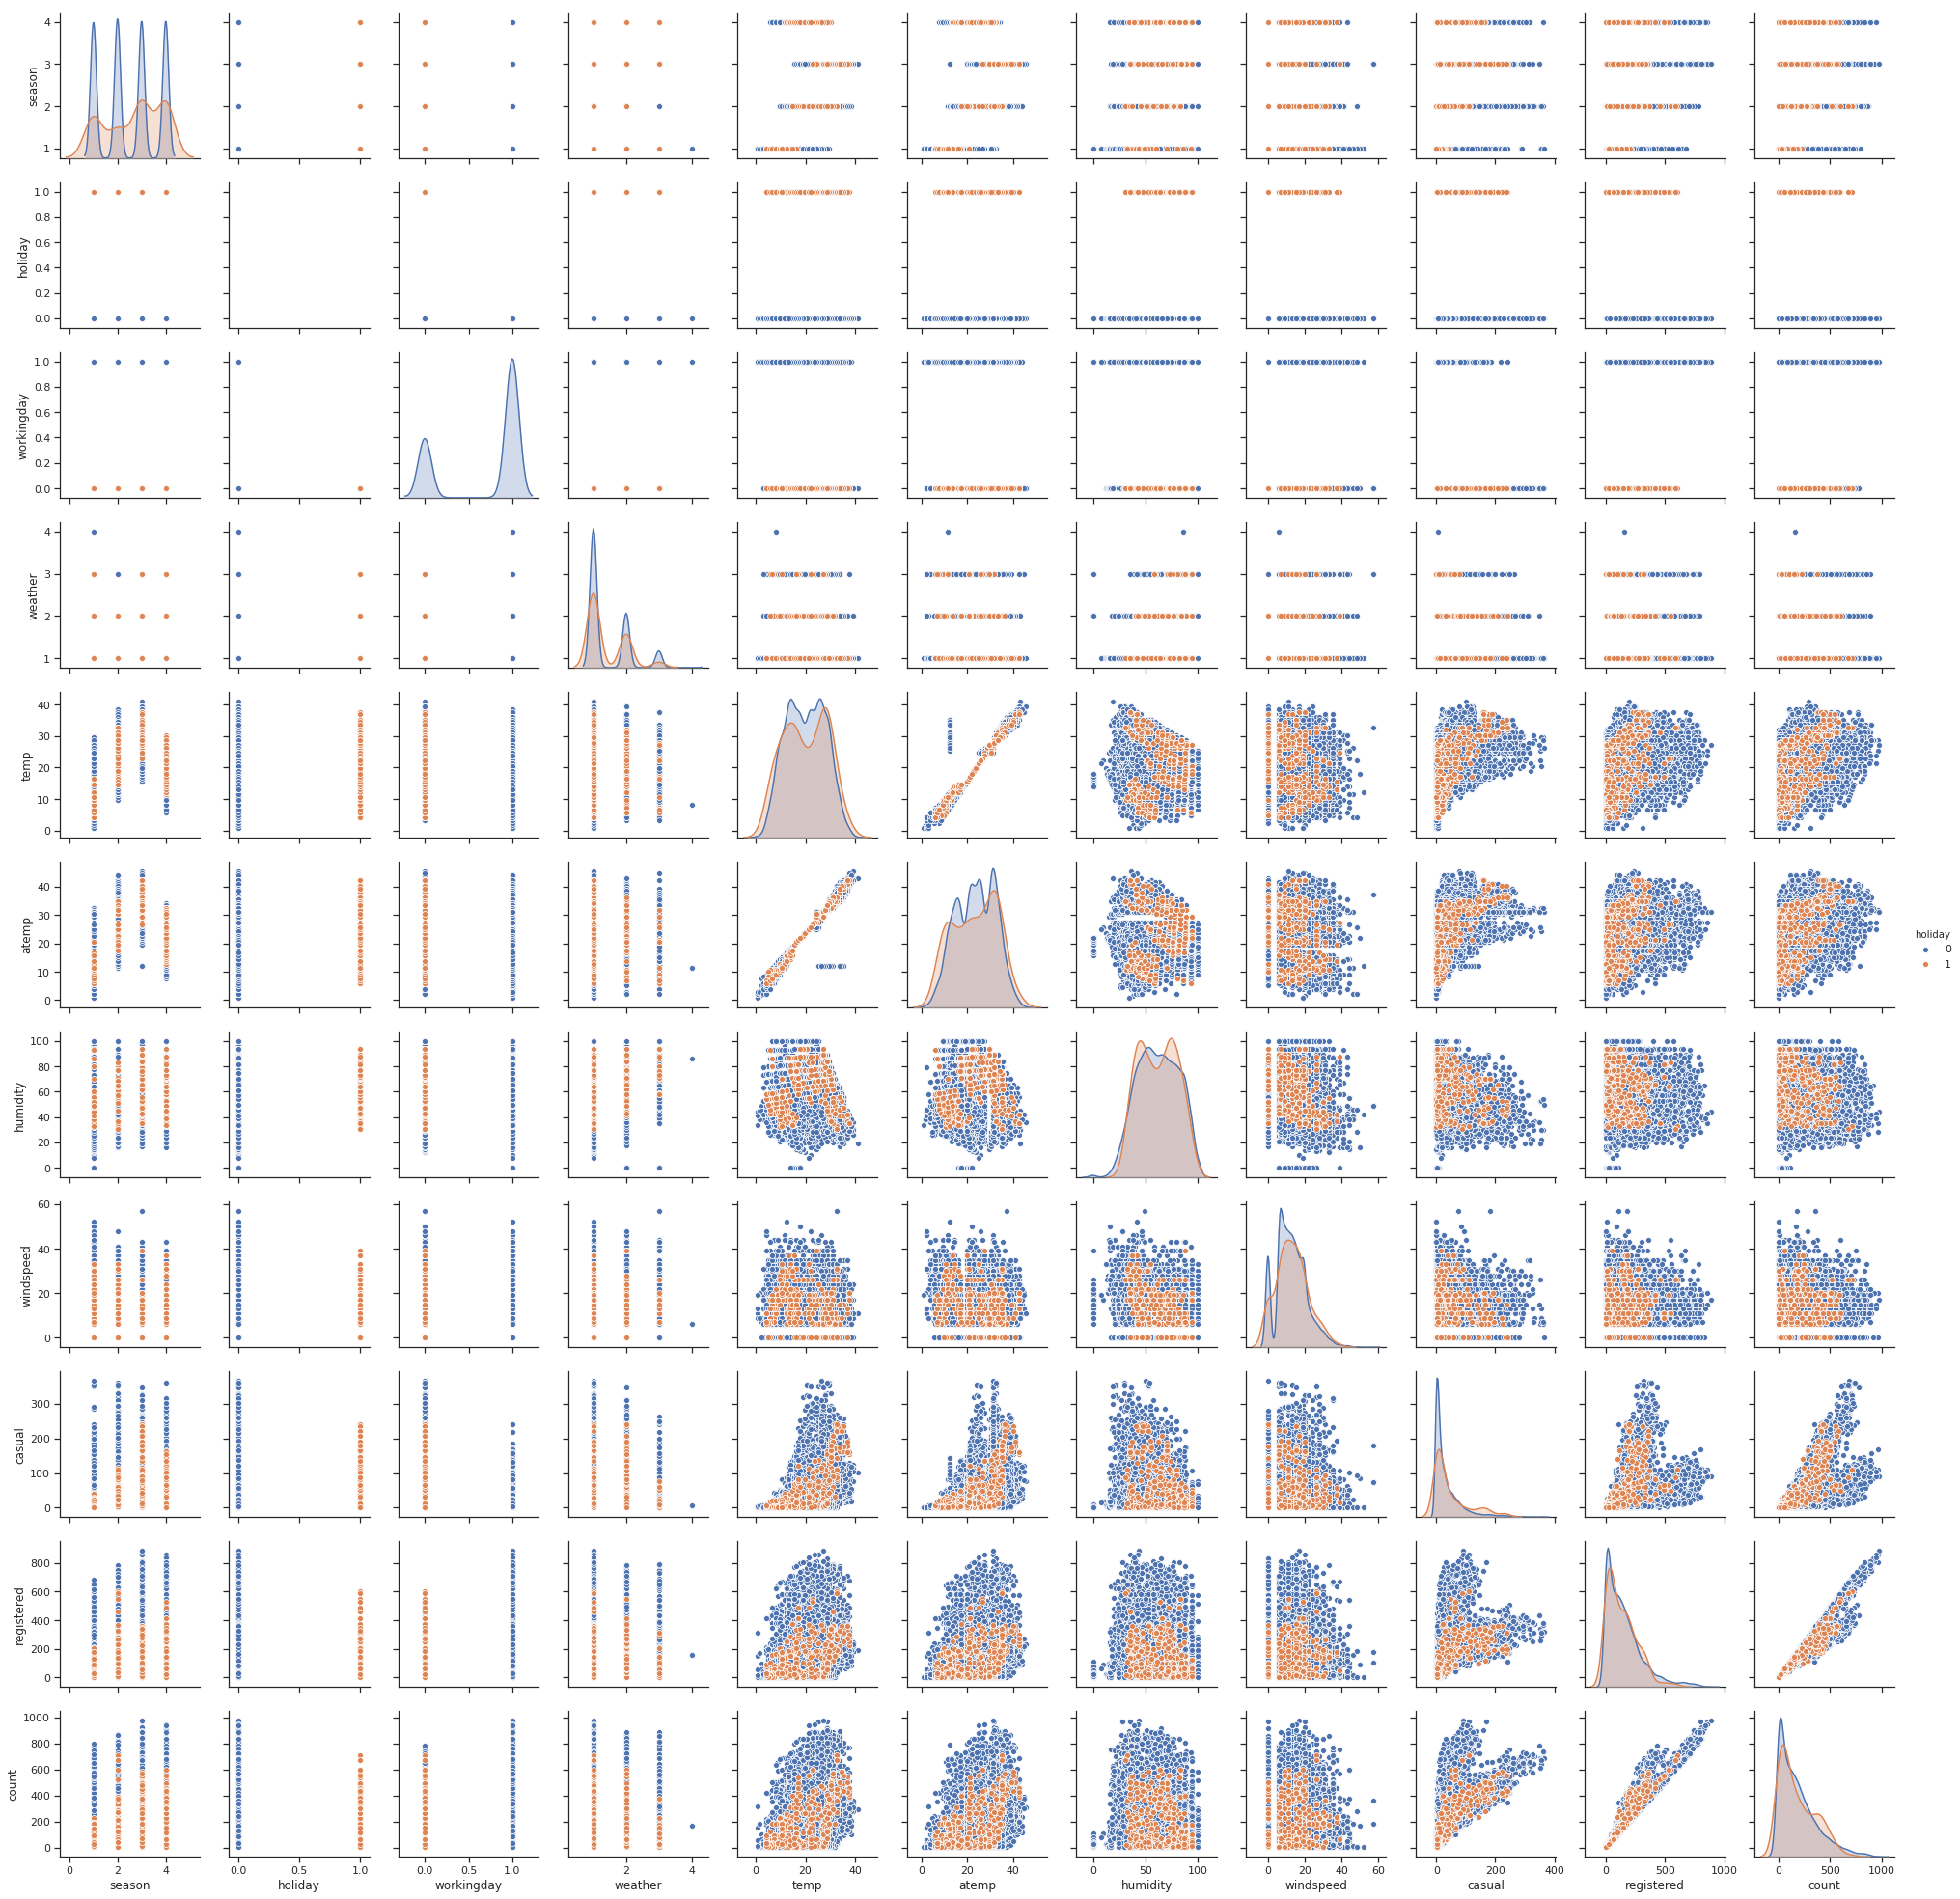

In [15]:
# classification par jour ferié
sns.set(style="ticks", color_codes=True)
sns.pairplot(bikes_share, hue="holiday")

# Nuages de points (Scatterplots)

## Variables "Nombre d'utilisations" vs variables météorologiques

### Variables "Nombre d'utilisations" vs variables météorologiques

Nous allons maintenant visualiser l'impact des variables météorologiques telles que : "Température", "Température Ressentie", "Humidité" et "Vitesse du vent" sur le nombre d'utilisations par des non-abonnés (casual), sur le nombre d'utilisations par des abonnés (registered) et sur le nombre d'utilisations total (count).

Donc à visualiser les subplots de:
> - casual vs temp, casual vs atemp, casual vs humidity et casual vs windspeed
> - registered vs temp, registered vs atemp, registered vs humidity et registered vs windspeed
> - count vs temp, count vs atemp, count vs humidity et count vs windspeed

## Utilisation par des non-abonnés (casual)

In [16]:
#reload(sys)
#sys.setdefaultencoding("utf-8")
# -*- coding: utf-8 -*-

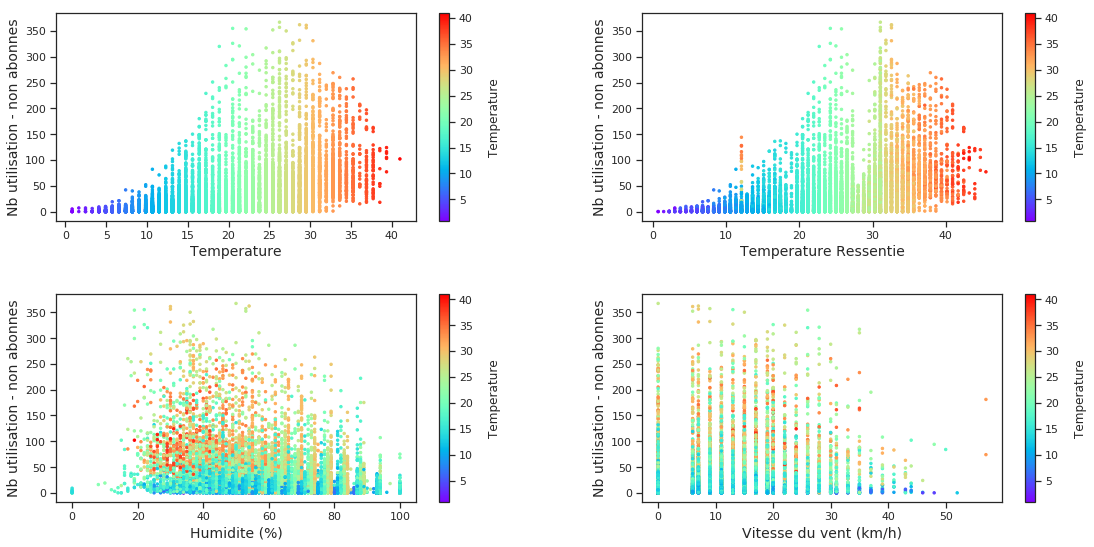

In [17]:
fig = plt.figure(figsize=(16, 8))  # taille de la figure
marker_size=6                      # taille du marker

plt.figure(1)

plt.subplot(221)
plt.scatter(bikes_share["temp"], bikes_share["casual"], marker_size, c=bikes_share.loc[:,"temp"] , cmap='rainbow')
plt.xlabel("Temperature", size=14)
plt.ylabel("Nb utilisation - non abonnes", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)
#------------------------------------------------------------------------------------------------------------#
plt.subplot(222)  
plt.scatter(bikes_share["atemp"], bikes_share["casual"], marker_size, c=bikes_share.loc[:,"temp"], cmap='rainbow')
plt.xlabel("Temperature Ressentie", size=14)
plt.ylabel("Nb utilisation - non abonnes", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)
#---------------------------------------------------------------------------------------------------------------#

plt.subplot(223)
plt.scatter(bikes_share["humidity"], bikes_share["casual"],marker_size, c=bikes_share.loc[:,"temp"], cmap='rainbow')
plt.xlabel("Humidite (%)", size=14)
plt.ylabel("Nb utilisation - non abonnes", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)
#-----------------------------------------------------------------------------------------------------------------#
plt.subplot(224)
plt.scatter(bikes_share["windspeed"], bikes_share["casual"], marker_size, c=bikes_share.loc[:,"temp"], cmap='rainbow')
plt.xlabel("Vitesse du vent (km/h)", size=14)
plt.ylabel("Nb utilisation - non abonnes", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.90, bottom=0.05, left=0.05, right=0.95, hspace=0.35,wspace=0.30)
plt.draw()
plt.show()

## Utilisation par des abonnés (Registered)

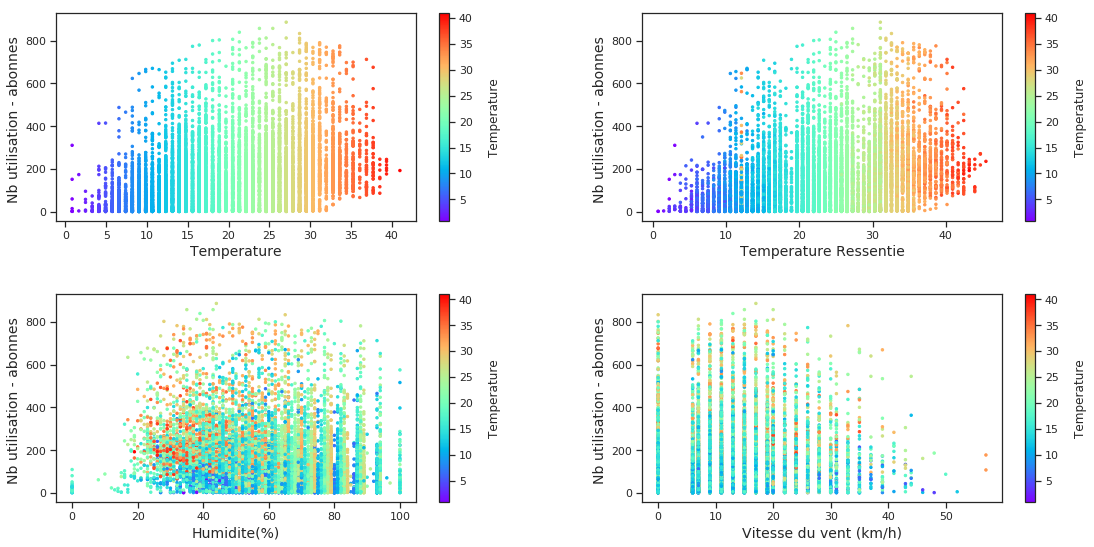

In [18]:
fig = plt.figure(figsize=(16, 8))  # taille de la figure
marker_size=6                      # taille du marker

plt.figure(1)

plt.subplot(221)
plt.scatter(bikes_share["temp"], bikes_share["registered"], marker_size, c=bikes_share.loc[:,"temp"] , cmap='rainbow')
plt.xlabel("Temperature", size=14)
plt.ylabel("Nb utilisation - abonnes ", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)

plt.subplot(222)  
plt.scatter(bikes_share["atemp"], bikes_share["registered"], marker_size, c=bikes_share.loc[:,"temp"], cmap='rainbow')
plt.xlabel("Temperature Ressentie", size=14)
plt.ylabel("Nb utilisation - abonnes ", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)

plt.subplot(223)
plt.scatter(bikes_share["humidity"], bikes_share["registered"],marker_size, c=bikes_share.loc[:,"temp"], cmap='rainbow')
plt.xlabel("Humidite(%)", size=14)
plt.ylabel("Nb utilisation - abonnes ", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)

plt.subplot(224)
plt.scatter(bikes_share["windspeed"], bikes_share["registered"], marker_size, c=bikes_share.loc[:,"temp"], cmap='rainbow')
plt.xlabel("Vitesse du vent (km/h)", size=14)
plt.ylabel("Nb utilisation - abonnes ", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.90, bottom=0.05, left=0.05, right=0.95, hspace=0.35,wspace=0.30)
plt.draw()
plt.show()

## Utilisation totale (count)

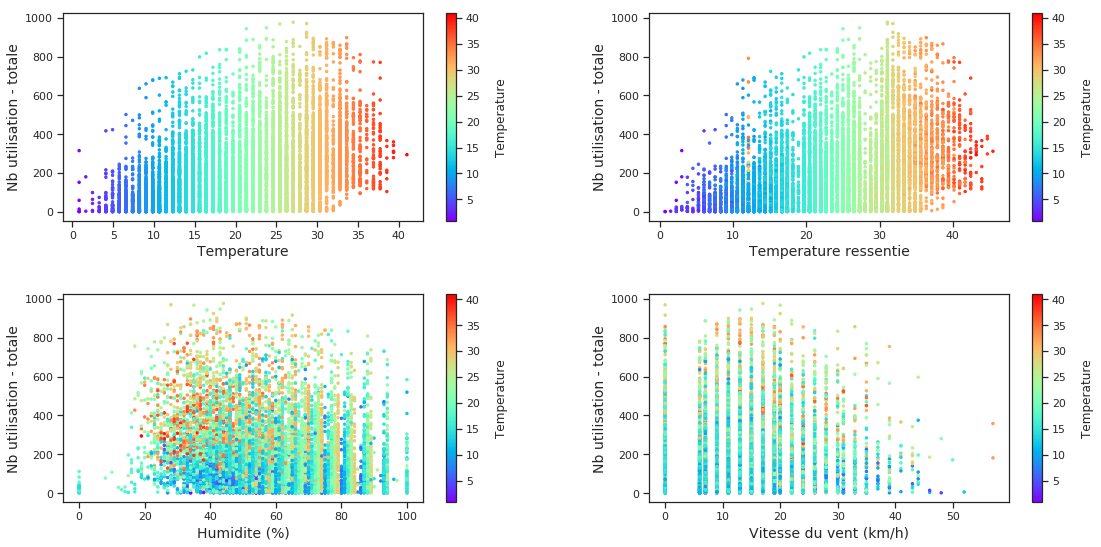

In [19]:
fig = plt.figure(figsize=(16, 8))  # taille de la figure
marker_size=6                      # taille du marker

plt.figure(1)

plt.subplot(221)
plt.scatter(bikes_share["temp"], bikes_share["count"], marker_size, c=bikes_share.loc[:,"temp"] , cmap='rainbow')
plt.xlabel("Temperature", size=14)
plt.ylabel("Nb utilisation - totale", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)

plt.subplot(222)  
plt.scatter(bikes_share["atemp"], bikes_share["count"], marker_size, c=bikes_share.loc[:,"temp"], cmap='rainbow')
plt.xlabel("Temperature ressentie", size=14)
plt.ylabel("Nb utilisation - totale", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)

plt.subplot(223)
plt.scatter(bikes_share["humidity"], bikes_share["count"],marker_size, c=bikes_share.loc[:,"temp"], cmap='rainbow')
plt.xlabel("Humidite (%)", size=14)
plt.ylabel("Nb utilisation - totale", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)

plt.subplot(224)
plt.scatter(bikes_share["windspeed"], bikes_share["count"], marker_size, c=bikes_share.loc[:,"temp"], cmap='rainbow')
plt.xlabel("Vitesse du vent (km/h)", size=14)
plt.ylabel("Nb utilisation - totale", size=14)
cmap= plt.colorbar()
cmap.set_label("\nTemperature", labelpad=+0.1, size=12)

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.90, bottom=0.05, left=0.05, right=0.95, hspace=0.35,wspace=0.30)
plt.draw()
plt.show()

### Observations et interprétation
> - On constate une moindre utilisation par temps très froid et très chaud.
> - Il est difficile de prédire et d'interpréter la corrélation en raison des superpositions entre plusieurs variabbles discrètes.

## Graphiques de séries temporelles (*Time series graph*)

Analyse des évolutions des variables selon les périodes :
> - Année
> - Mois
> - Jour
> - Heure

# TRANSFORMATION SUR LE FICHIER :  Fichier de travail (bikes_share) et test de KAGGLE (KAGGLE_test)
> -  Prend que les éléments correspondants aux dates 
>-  Crée une nouvelle colonne qui va contenir le précédent résultat

In [20]:
bikes_share.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011/01/01 00:00:00       1        0           0        1  9.84  14.395   
2011/01/01 01:00:00       1        0           0        1  9.02  13.635   
2011/01/01 02:00:00       1        0           0        1  9.02  13.635   
2011/01/01 03:00:00       1        0           0        1  9.84  14.395   
2011/01/01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011/01/01 00:00:00        81        0.0       3          13     16  
2011/01/01 01:00:00        80        0.0       8          32     40  
2011/01/01 02:00:00        80        0.0       5          27     32  
2011/01/01 03:00:00        75        0.0       3          10     13  
2011/01/01 04:00:00        75        0.0       0           1      1

In [21]:
# separate date from index column and convert it to datetime format
i=0
while i < len(bikes_share): 
    # separate date from index column and convert it to datetime format
    
    bikes_share.loc[i:,"date"] = bikes_share.index[i]
    bikes_share.loc[i:,"date"] = pd.to_datetime(bikes_share.loc[:,"date"][i])
    
    # separate date [AAAA-MM] from index column and convert it to string format
    bikes_share.loc[i:,"date_str"] = bikes_share.index[i][0:7] 
    
    # separate time from index column and keep it as string format
    bikes_share.loc[i:,"time"] = bikes_share.index[i][11:13]
    i+=1
#TEST DE KAGGLE
j=0
while j < len(kaggle_test): 
    kaggle_test.loc[j:,"date"] = kaggle_test.index[j]
    kaggle_test.loc[j:,"date"] = pd.to_datetime(kaggle_test.loc[:,"date"][j])
    
    # separate date [AAAA-MM] from index column and convert it to string format
    kaggle_test.loc[j:,"date_str"] = kaggle_test.index[j][0:7]
    
    # separate time from index column and keep it as string format
    kaggle_test.loc[j:,"time"] = kaggle_test.index[j][11:13]
    j+=1 

In [22]:
bikes_share.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011/01/01 00:00:00       1        0           0        1  9.84  14.395   
2011/01/01 01:00:00       1        0           0        1  9.02  13.635   
2011/01/01 02:00:00       1        0           0        1  9.02  13.635   
2011/01/01 03:00:00       1        0           0        1  9.84  14.395   
2011/01/01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  \
datetime                                                              
2011/01/01 00:00:00        81        0.0       3          13     16   
2011/01/01 01:00:00        80        0.0       8          32     40   
2011/01/01 02:00:00        80        0.0       5          27     32   
2011/01/01 03:00:00        75        0.0       3          10     13   
2011/01/01 04:00:00        75        0.0       0           1      1   

                                    date date_str time  
datetime                                                
2011/01/01 00:00:00  2011-01-01 00:00:00  2011/01   00  
2011/01/01 01:00:00  2011-01-01 01:00:00  2011/01   01  
2011/01/01 02:00:00  2011-01-01 02:00:00  2011/01   02  
2011/01/01 03:00:00  2011-01-01 03:00:00  2011/01   03  
2011/01/01 04:00:00  2011-01-01 04:00:00  2011/01   04

In [23]:
kaggle_test.head(5)

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

                     humidity  windspeed                 date date_str time  
datetime                                                                     
2011-01-20 00:00:00        56    26.0027  2011-01-20 00:00:00  2011-01   00  
2011-01-20 01:00:00        56     0.0000  2011-01-20 01:00:00  2011-01   01  
2011-01-20 02:00:00        56     0.0000  2011-01-20 02:00:00  2011-01   02  
2011-01-20 03:00:00        56    11.0014  2011-01-20 03:00:00  2011-01   03  
2011-01-20 04:00:00        56    11.0014  2011-01-20 04:00:00  2011-01   04

## Evolution anuelle de paramètres météorologiques

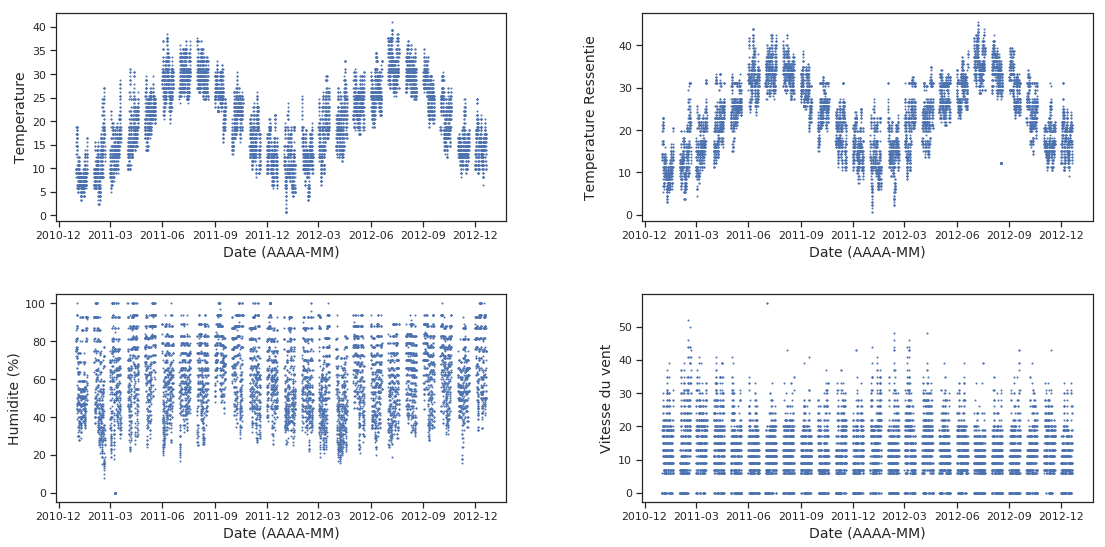

In [24]:
fig = plt.figure(figsize=(16, 8))  # taille de la figure
marker_size=6                      # taille de la marker
plt.figure(1)

plt.subplot(221)
plt.plot_date(bikes_share['date'], bikes_share['temp'], '.', markersize=2)
plt.xlabel('Date (AAAA-MM)\n', size=14)
plt.ylabel("Temperature", size=14)

#-------------------------------------------------------------------------------------------#
plt.subplot(222)
plt.plot_date(bikes_share['date'], bikes_share['atemp'], '.', markersize=2)
plt.xlabel('Date (AAAA-MM)\n', size=14)
plt.ylabel('Temperature Ressentie\n', size=14)
#------------------------------------------------------------------------------------------#
plt.subplot(223)
plt.plot_date(bikes_share['date'], bikes_share['humidity'], '.', markersize=2)
plt.xlabel('Date (AAAA-MM)', size=14)
plt.ylabel('Humidite (%)', size=14)
#--------------------------------------------------------------------------------------------#
plt.subplot(224)
plt.plot_date(bikes_share['date'], bikes_share['windspeed'], '.', markersize=2)
plt.xlabel('Date (AAAA-MM)', size=14)
plt.ylabel('Vitesse du vent', size=14)
#---------------------------------------------------------------------------------------------#
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.90, bottom=0.05, left=0.05, right=0.95, hspace=0.35,wspace=0.30)

plt.show()


## Evolution anuelle de l'utilisation de vélo

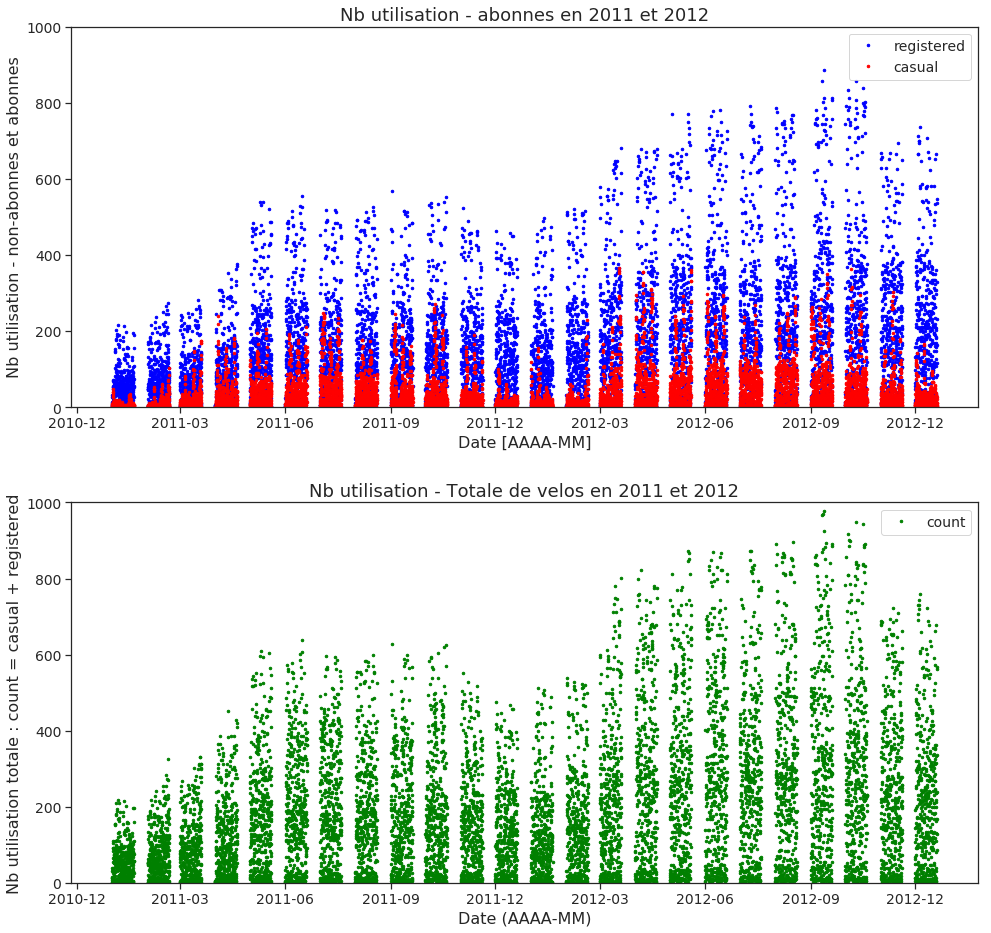

In [25]:
fig = plt.figure(figsize=(14, 14))  # taille de la figure
marker_size=5                      # taille de la marker
plt.figure(1)

plt.subplot(211)
plt.plot_date(bikes_share['date'], bikes_share['registered'], '.', markersize=marker_size , color="blue")
plt.plot_date(bikes_share['date'], bikes_share['casual'], '.', markersize=marker_size , color="red")
plt.ylabel('Nb utilisation - non-abonnes et abonnes', size=16)
plt.xlabel('Date [AAAA-MM]', size=16)
plt.title('Nb utilisation - abonnes en 2011 et 2012', size=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim((0,1000))
#-------------------------------------------------------------------------------#
plt.subplot(212)
plt.plot_date(bikes_share['date'], bikes_share['count'], '.', markersize=marker_size , color="green")
plt.ylabel('Nb utilisation totale : count = casual + registered', size=16)
plt.xlabel('Date (AAAA-MM)', size=16)
plt.title('Nb utilisation - Totale de velos en 2011 et 2012', size=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim((0,1000))

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.90, bottom=0.05, left=0.05, right=0.95, hspace=0.25, wspace=0.30)
plt.show()

__Observation :__
> - En général, plus d'utilisation par des abonnées que des non-abonnées pendant toute l'année
> - Dans tous les trois cas, la forme de l'utilisation marque un peu près la même tendance

# SEPARE LES DIFFERENTS ELEMENTS DE LA DATE ET LES METS DANS DE NOUVELLES COLONNES

In [26]:
bikes_share["An"] = bikes_share["date"].dt.year
bikes_share["Mois"] = bikes_share["date"].dt.month
bikes_share["Jours"] = bikes_share["date"].dt.day

#------------------ Pour le jeu de test de kaggle --------------------# 

kaggle_test["An"] = kaggle_test["date"].dt.year
kaggle_test["Mois"] = kaggle_test["date"].dt.month
kaggle_test["Jours"] = kaggle_test["date"].dt.day

In [27]:
bikes_share.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011/01/01 00:00:00       1        0           0        1  9.84  14.395   
2011/01/01 01:00:00       1        0           0        1  9.02  13.635   
2011/01/01 02:00:00       1        0           0        1  9.02  13.635   
2011/01/01 03:00:00       1        0           0        1  9.84  14.395   
2011/01/01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  \
datetime                                                              
2011/01/01 00:00:00        81        0.0       3          13     16   
2011/01/01 01:00:00        80        0.0       8          32     40   
2011/01/01 02:00:00        80        0.0       5          27     32   
2011/01/01 03:00:00        75        0.0       3          10     13   
2011/01/01 04:00:00        75        0.0       0           1      1   

                                    date date_str time    An  Mois  Jours  
datetime                                                                   
2011/01/01 00:00:00  2011-01-01 00:00:00  2011/01   00  2011     1      1  
2011/01/01 01:00:00  2011-01-01 01:00:00  2011/01   01  2011     1      1  
2011/01/01 02:00:00  2011-01-01 02:00:00  2011/01   02  2011     1      1  
2011/01/01 03:00:00  2011-01-01 03:00:00  2011/01   03  2011     1      1  
2011/01/01 04:00:00  2011-01-01 04:00:00  2011/01   04  2011     1      1

# FONCTION POUR RAJOUTER UNE COLONNE CORRESPONDANT AUX NOMS DES MOIS

In [28]:
def add_name_month(dta):
    name_mois = []
    for i in range(len(dta)):
        #print(i)
        if dta["Mois"][i] ==1:
            name_mois.append("Janvier")
        if dta["Mois"][i] == 2:
            name_mois.append("Fevrier")
        if dta["Mois"][i] == 3:
            name_mois.append("Mars")
        if dta["Mois"][i] == 4:
            name_mois.append("Avril")
        if dta["Mois"][i] == 5:
            name_mois.append("Mai")
        if dta["Mois"][i] == 6:
            name_mois.append("Juin")
        if dta["Mois"][i] == 7:
            name_mois.append("Juillet")
        if dta["Mois"][i] == 8:
            name_mois.append("Aout")
        if dta["Mois"][i] == 9:
            name_mois.append("Septembre")
        if dta["Mois"][i] == 10:
            name_mois.append("Octobre")
        if dta["Mois"][i] == 11:
            name_mois.append("Novembre")
        if dta["Mois"][i] == 12:
            name_mois.append("Decembre")
    # Rajoute cette nouvelle colonnes dans le dataframe
    dta.loc[:,"name_mois"] = name_mois
    return dta

Appel de la fonction

In [29]:
bikes_share =  add_name_month(dta = bikes_share)
kaggle_test =  add_name_month(dta = kaggle_test)

In [30]:
bikes_share.shape

(10886, 18)

# FONCTION POUR RAJOUTER UNE COLONNE CORRESPONDANT AUX NOMS DES SAISONS

In [31]:
def add_season(dta):
    name_season = []
    for i in range(len(dta)):
        #print(i)
        if dta["season"][i]==1:
            name_season.append("printemps")
        if dta["season"][i]==2:
            name_season.append("ete")
        if dta["season"][i]==3:
            name_season.append("automne")
        if dta["season"][i]==4:
            name_season.append("hiver")
    # Rajoute la nouvelle colonne portant le nom des saisons
    dta.loc[:,"name_season"] = name_season
    return dta

In [32]:
bikes_share =  add_season(dta = bikes_share)
kaggle_test =  add_season(dta = kaggle_test)

In [33]:
bikes_share.shape

(10886, 19)

## Distribution de l'utilisation totale de vélo en focntion des saisons

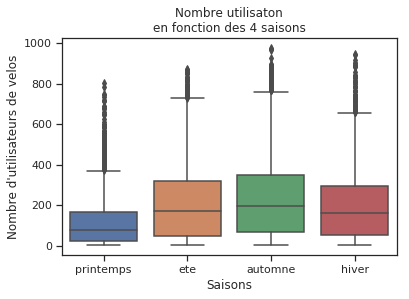

In [34]:
sns.boxplot(x="name_season",y="count" ,data = bikes_share)
# ,showfliers=False pour enlever les outliers
#---------- Titre les axes -------#
plt.title("Nombre utilisaton\nen fonction des 4 saisons")
plt.xlabel("Saisons")
plt.ylabel("Nombre d'utilisateurs de velos")
plt.show()

## Evolution horaire de l'utilisation du vélo

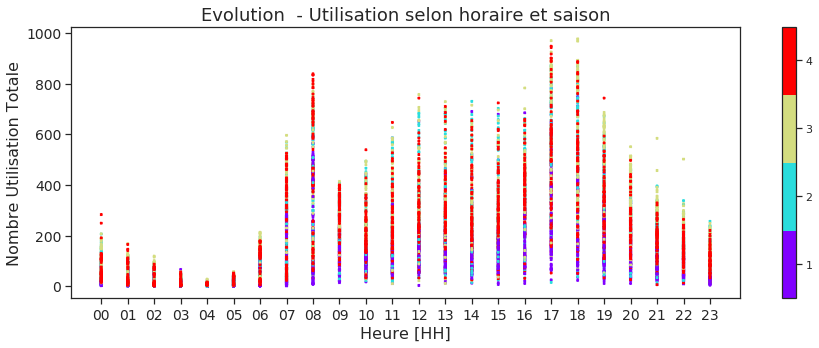

In [35]:
# count vs time series scatterplot    
fig = plt.figure(figsize=(15, 5))
plt.scatter(bikes_share['time'], bikes_share['count'], c=bikes_share['season'], s=5, marker = "x",
            cmap=plt.cm.get_cmap('rainbow', 4))
plt.ylabel('Nombre Utilisation Totale', size=16)
plt.xlabel('Heure [HH]', size=16)
plt.title('Evolution  - Utilisation selon horaire et saison', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.colorbar(ticks=[1, 2, 3, 4])
#plt.colorbar(labels=['hiver','printemps','été', 'automne'])
plt.clim(0.5, 4.5)
plt.show()

__Observation :__
> - Moins d'utilisation vers 4h
> - Utilisation du vélo est très importante pendant les heures de pointe (*peak hours*)
>   > - Commencement de la journée : 7h-8h
>   > - Fin de la journée : 17h-18h

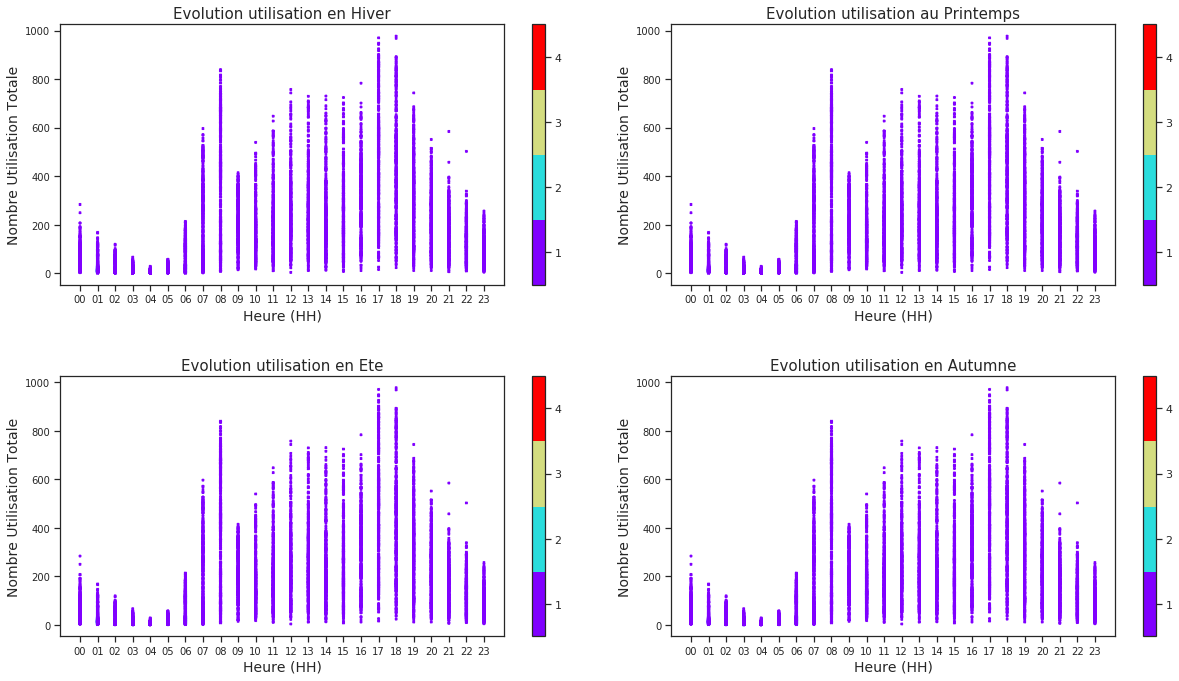

In [36]:
import matplotlib
from matplotlib.ticker import NullFormatter

# subplots : count vs time / season   
fig = plt.figure(figsize=(18, 10))
plt.figure(1)

#---------------------------------- winter ----------------------------------#
plt.subplot(221)
plt.scatter(bikes_share['time'], bikes_share['count'], c=bikes_share['season']==1, s=5, marker = "x",
            cmap=plt.cm.get_cmap('rainbow', 4))
plt.title('Evolution utilisation en Hiver', size=15)
plt.ylabel('Nombre Utilisation Totale', size=14)
plt.xlabel('Heure (HH)', size=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.colorbar(ticks=[1, 2, 3, 4])
plt.clim(0.5, 4.5)

#------------------------------------ spring --------------------------------#
plt.subplot(222)
plt.scatter(bikes_share['time'], bikes_share['count'], c=bikes_share['season']==2, s=5, marker = "x",
            cmap=plt.cm.get_cmap('rainbow', 4))
plt.title('Evolution utilisation au Printemps', size=15)
plt.ylabel('Nombre Utilisation Totale', size=14)
plt.xlabel('Heure (HH)', size=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.colorbar(ticks=[1, 2, 3, 4])
plt.clim(0.5, 4.5)

#------------------------------------summer --------------------------------------#
plt.subplot(223)
plt.scatter(bikes_share['time'], bikes_share['count'], c=bikes_share['season']==3, s=5, marker = "x",
            cmap=plt.cm.get_cmap('rainbow', 4))
plt.title('Evolution utilisation en Ete', size=15)
plt.ylabel('Nombre Utilisation Totale', size=14)
plt.xlabel('Heure (HH)', size=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.colorbar(ticks=[1, 2, 3, 4])
plt.clim(0.5, 4.5)

#---------------------------------- autumn -----------------------------------------#
plt.subplot(224)
plt.scatter(bikes_share['time'], bikes_share['count'], c=bikes_share['season']==4, s=5, marker = "x",
            cmap=plt.cm.get_cmap('rainbow', 4))
plt.title('Evolution utilisation en Autumne', size=15)
plt.ylabel('Nombre Utilisation Totale', size=14)
plt.xlabel('Heure (HH)', size=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.colorbar(ticks=[1, 2, 3, 4])
plt.clim(0.5, 4.5)

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.90, bottom=0.05, left=0.05, right=0.95, hspace=0.35,wspace=0.1)
plt.show()

In [37]:
bikes_share.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011/01/01 00:00:00       1        0           0        1  9.84  14.395   
2011/01/01 01:00:00       1        0           0        1  9.02  13.635   
2011/01/01 02:00:00       1        0           0        1  9.02  13.635   
2011/01/01 03:00:00       1        0           0        1  9.84  14.395   
2011/01/01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  \
datetime                                                              
2011/01/01 00:00:00        81        0.0       3          13     16   
2011/01/01 01:00:00        80        0.0       8          32     40   
2011/01/01 02:00:00        80        0.0       5          27     32   
2011/01/01 03:00:00        75        0.0       3          10     13   
2011/01/01 04:00:00        75        0.0       0           1      1   

                                    date date_str time    An  Mois  Jours  \
datetime                                                                    
2011/01/01 00:00:00  2011-01-01 00:00:00  2011/01   00  2011     1      1   
2011/01/01 01:00:00  2011-01-01 01:00:00  2011/01   01  2011     1      1   
2011/01/01 02:00:00  2011-01-01 02:00:00  2011/01   02  2011     1      1   
2011/01/01 03:00:00  2011-01-01 03:00:00  2011/01   03  2011     1      1   
2011/01/01 04:00:00  2011-01-01 04:00:00  2011/01   04  2011     1      1   

                    name_mois name_season  
datetime                                   
2011/01/01 00:00:00   Janvier   printemps  
2011/01/01 01:00:00   Janvier   printemps  
2011/01/01 02:00:00   Janvier   printemps  
2011/01/01 03:00:00   Janvier   printemps  
2011/01/01 04:00:00   Janvier   printemps

## Utilisation selon le mois et l'année

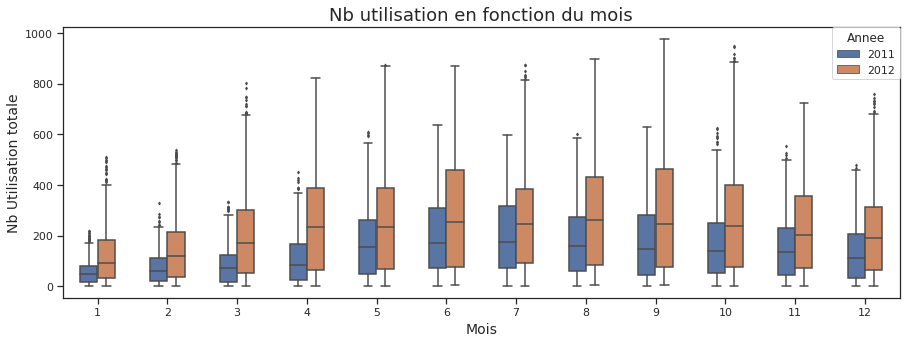

In [38]:
fig = plt.figure(figsize=(15, 5))
plt.figure(1)
sns.boxplot(x="Mois",y="count", data = bikes_share, hue = "An", width=0.5, fliersize=2)
# ,showfliers=False) pour enlever les outliers

plt.title("Nb utilisation en fonction du mois" ,size=18)
plt.xlabel("Mois", size=14)
plt.ylabel("Nb Utilisation totale", size=14)
plt.legend(title="Annee", loc="best", borderaxespad=0.)
plt.show()

## Utilisation selon saison

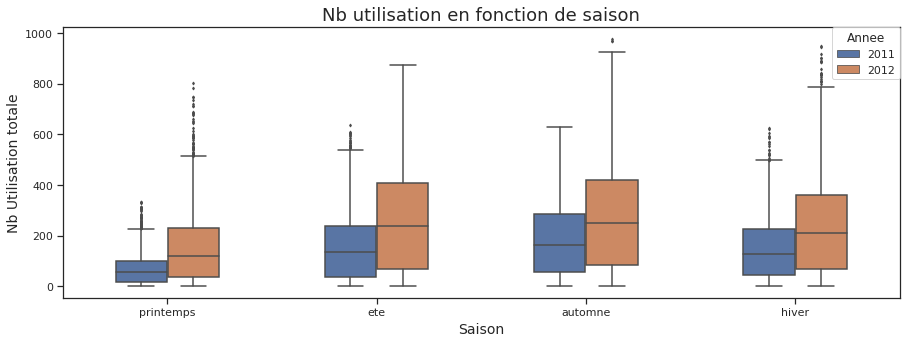

In [39]:
fig = plt.figure(figsize=(15, 5))
plt.figure(1)
sns.boxplot(x="name_season",y="count", data = bikes_share, hue = "An", width=0.5, fliersize=2)
# ,showfliers=False) pour enlever les outliers

plt.title("Nb utilisation en fonction de saison" ,size=18)
plt.xlabel("Saison", size=14)
plt.ylabel("Nb Utilisation totale", size=14)
plt.legend(title="Annee", loc="best", borderaxespad=0.0)
plt.show()

## Utilisation selon météo

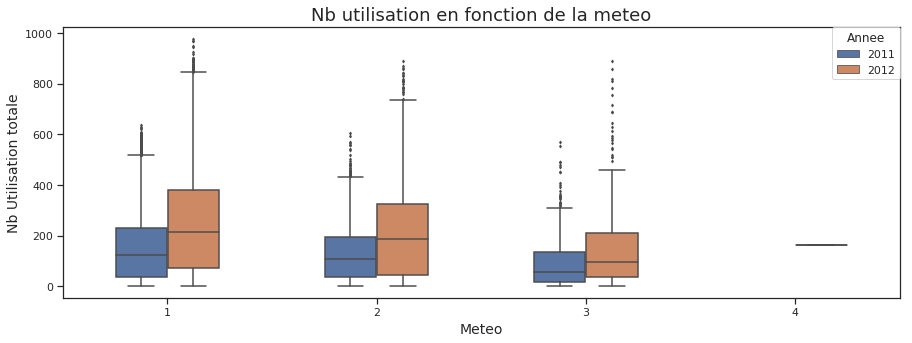

In [40]:
fig = plt.figure(figsize=(15, 5))
plt.figure(1)
sns.boxplot(x="weather",y="count", data = bikes_share, hue = "An", width=0.5, fliersize=2)
# ,showfliers=False) pour enlever les outliers

plt.title("Nb utilisation en fonction de la meteo" ,size=18)
plt.xlabel("Meteo", size=14)
plt.ylabel("Nb Utilisation totale", size=14)
plt.legend(title="Annee",loc="best", borderaxespad=0.0)

__Rappel pour le type de météo (*weather*) :__

> - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
> - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
> - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
> - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

__Observation :__
> - Presque pas d'utilisation pour la météo de type 4 (fort pluie, grèle, brouillard, neige)
> - Quelle que soit la météo, l'utilisation en 2012 est légèrement différente comparé en 2011

# ENLEVE LES 3 PREMIERS MOIS DE LA PREMIERE ANNEE 

>- Car il y a des plages horaires qui manquent pendant les 3 premiers mois¶
>- Nous travaillons sur les 2 fichiers en parallèle :  AVEC OU SANS LES 3 PREMIERS MOIS

In [41]:
bikes_2011 = bikes_share[bikes_share["An"]==2011]
bikes_2011 = bikes_2011[bikes_2011["Mois"] <= 3]
bikes_share_no_missing_values = bikes_share.drop(bikes_2011.index)

In [42]:
bikes_share_no_missing_values.shape

(9563, 19)

# SEPARE LES VARIABLES PREDICTRICES ET CELLES A PREDIRE AVANT DE RAJOUTER LES VARIABLES ARTIFICIELLES

In [43]:
out_come = bikes_share[["casual", "registered", "count"]]
bikes_share = bikes_share.drop(["casual", "registered", "count"], axis=1)

#-------------------------- POUR LES DONNEES COMPLETES -----------------------------------#
out_come_no_missing_values = bikes_share_no_missing_values[["casual", "registered", "count"]]
bikes_share_no_missing_values  = bikes_share_no_missing_values.drop(["casual", "registered", "count"], axis=1)

In [44]:
bikes_share.shape, bikes_share_no_missing_values.shape

((10886, 16), (9563, 16))

# PREPROCESSING

## Enrichissement de la données : ajout de variables artificielles

### Variables dummies :  season et weather

>- Fonction pour variables dummies

In [45]:
def var_dummies(df,col_int):
    dummies_var = pd.get_dummies(df[col_int])
    dummies_var.columns = [col_int + "_1",col_int + "_2",col_int + "_3",col_int + "_4"]
    #------------ Rajoute ces nouvelles colonnes -----------------#
    df = pd.concat([df,dummies_var], axis = 1)
    return df

>- Utilisation e la fonction var_dummies

In [46]:
bikes_share = var_dummies(df = bikes_share,col_int = "season")
bikes_share = var_dummies(df = bikes_share,col_int = "weather")

#------------ Pour les donnees filtrées
bikes_share_no_missing_values = var_dummies(df = bikes_share_no_missing_values,col_int = "season")
bikes_share_no_missing_values = var_dummies(df = bikes_share_no_missing_values,col_int = "weather")

#------------- Pour le test de KAGGLE
kaggle_test = var_dummies(df = kaggle_test,col_int = "season")
kaggle_test = var_dummies(df = kaggle_test,col_int = "weather")

In [47]:
bikes_share.shape, bikes_share_no_missing_values.shape, kaggle_test.shape

((10886, 24), (9563, 24), (6493, 24))

### minimum, moyenne et le maximum mensuel des variables continues

>- Fonction pour ajouter ces variables artificielles

In [48]:
def add_va(month,df,operande,var,nom_var):
    # declare les variables 
    var_art = []
    tail_bike_saison = []
    # recupere la taille des dataframes pour chaque saison
    # operande correspond au type d'opération qu'on veut faire 
    for i in month:
        tail_bike_saison.append(len(df[df["Mois"]==i]))
        var_art.append(round(operande(df[df["Mois"]==i][var]),2))

    # Repete le nombre de fois possible les moyennes de temperatures
    # transforme les numpy array en dataframe puis en list
    moy_var_art_array = []
    moy_var_art_all = pd.DataFrame()
    for i in range(len(var_art)):
        #print(i)
        moy_var_art_array.append(np.repeat(var_art[i],tail_bike_saison[i]))
        moy_var_art_all = moy_var_art_all.append(moy_var_art_array[i].tolist())
    
    moy_var_art_all_list = moy_var_art_all.values.tolist()
    df.loc[:,nom_var] = moy_var_art_all_list
    return df

>- Utilisation de la fonction add_va : les données initiales

In [49]:
mois = bikes_share["Mois"].unique()
bikes_share = add_va(month = mois,df = bikes_share, operande = np.min, var = "temp",nom_var = "temp_min")
bikes_share = add_va(month = mois,df = bikes_share, operande = np.mean, var = "temp", nom_var = "temp_moy")
bikes_share = add_va(month = mois,df = bikes_share, operande = np.max, var = "temp",nom_var = "temp_max")
#------------------------------------------------------------------------------------#
bikes_share = add_va(month = mois,df = bikes_share, operande = np.min, var = "atemp",nom_var = "atemp_min")
bikes_share = add_va(month = mois,df = bikes_share, operande = np.mean, var = "atemp",nom_var = "atemp_moy")
bikes_share = add_va(month = mois,df = bikes_share, operande = np.max, var = "atemp",nom_var = "atemp_max")
#------------------------------------------------------------------------------------#
bikes_share = add_va(month = mois,df = bikes_share, operande = np.min, var = "humidity",nom_var = "humidity_min")
bikes_share = add_va(month = mois,df = bikes_share, operande = np.mean, var = "humidity",nom_var = "humidity_moy")
bikes_share = add_va(month = mois,df = bikes_share, operande = np.max, var = "humidity",nom_var = "humidity_max")

In [50]:
bikes_share.shape

(10886, 33)

In [51]:
bikes_share.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011/01/01 00:00:00       1        0           0        1  9.84  14.395   
2011/01/01 01:00:00       1        0           0        1  9.02  13.635   
2011/01/01 02:00:00       1        0           0        1  9.02  13.635   
2011/01/01 03:00:00       1        0           0        1  9.84  14.395   
2011/01/01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed                 date date_str  \
datetime                                                                 
2011/01/01 00:00:00        81        0.0  2011-01-01 00:00:00  2011/01   
2011/01/01 01:00:00        80        0.0  2011-01-01 01:00:00  2011/01   
2011/01/01 02:00:00        80        0.0  2011-01-01 02:00:00  2011/01   
2011/01/01 03:00:00        75        0.0  2011-01-01 03:00:00  2011/01   
2011/01/01 04:00:00        75        0.0  2011-01-01 04:00:00  2011/01   

                         ...      weather_4  temp_min  temp_moy  temp_max  \
datetime                 ...                                                
2011/01/01 00:00:00      ...              0      0.82      9.84     23.78   
2011/01/01 01:00:00      ...              0      0.82      9.84     23.78   
2011/01/01 02:00:00      ...              0      0.82      9.84     23.78   
2011/01/01 03:00:00      ...              0      0.82      9.84     23.78   
2011/01/01 04:00:00      ...              0      0.82      9.84     23.78   

                    atemp_min atemp_moy  atemp_max  humidity_min  \
datetime                                                           
2011/01/01 00:00:00      0.76     12.08      27.27          25.0   
2011/01/01 01:00:00      0.76     12.08      27.27          25.0   
2011/01/01 02:00:00      0.76     12.08      27.27          25.0   
2011/01/01 03:00:00      0.76     12.08      27.27          25.0   
2011/01/01 04:00:00      0.76     12.08      27.27          25.0   

                     humidity_moy  humidity_max  
datetime                                         
2011/01/01 00:00:00         55.91         100.0  
2011/01/01 01:00:00         55.91         100.0  
2011/01/01 02:00:00         55.91         100.0  
2011/01/01 03:00:00         55.91         100.0  
2011/01/01 04:00:00         55.91         100.0  

[5 rows x 33 columns]

>- Utilisation de la fonction add_va : les données filtrées

In [52]:
mois = bikes_share["Mois"].unique()
bikes_share_no_missing_values = add_va(month = mois,df = bikes_share_no_missing_values, operande = np.min, var = "temp",nom_var = "temp_min")
bikes_share_no_missing_values = add_va(month = mois,df = bikes_share_no_missing_values, operande = np.mean, var = "temp", nom_var = "temp_moy")
bikes_share_no_missing_values = add_va(month = mois,df = bikes_share_no_missing_values, operande = np.max, var = "temp",nom_var = "temp_max")
#------------------------------------------------------------------------------------#
bikes_share_no_missing_values = add_va(month = mois,df = bikes_share_no_missing_values, operande = np.min, var = "atemp",nom_var = "atemp_min")
bikes_share_no_missing_values = add_va(month = mois,df = bikes_share_no_missing_values, operande = np.mean, var = "atemp",nom_var = "atemp_moy")
bikes_share_no_missing_values = add_va(month = mois,df = bikes_share_no_missing_values, operande = np.max, var = "atemp",nom_var = "atemp_max")
#------------------------------------------------------------------------------------#
bikes_share_no_missing_values = add_va(month = mois,df = bikes_share_no_missing_values, operande = np.min, var = "humidity",nom_var = "humidity_min")
bikes_share_no_missing_values = add_va(month = mois,df = bikes_share_no_missing_values, operande = np.mean, var = "humidity",nom_var = "humidity_moy")
bikes_share_no_missing_values = add_va(month = mois,df = bikes_share_no_missing_values, operande = np.max, var = "humidity",nom_var = "humidity_max")

In [53]:
bikes_share_no_missing_values.shape

(9563, 33)

In [54]:
bikes_share_no_missing_values.head()

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011/04/01 00:00:00       2        0           1        3  10.66  12.880   
2011/04/01 01:00:00       2        0           1        3  10.66  12.880   
2011/04/01 02:00:00       2        0           1        3  10.66  12.880   
2011/04/01 03:00:00       2        0           1        2   9.84  11.365   
2011/04/01 04:00:00       2        0           1        2   9.84  11.365   

                     humidity  windspeed                 date date_str  \
datetime                                                                 
2011/04/01 00:00:00       100    11.0014  2011-04-01 00:00:00  2011/04   
2011/04/01 01:00:00       100    11.0014  2011-04-01 01:00:00  2011/04   
2011/04/01 02:00:00        93    12.9980  2011-04-01 02:00:00  2011/04   
2011/04/01 03:00:00        93    16.9979  2011-04-01 03:00:00  2011/04   
2011/04/01 04:00:00        93    16.9979  2011-04-01 04:00:00  2011/04   

                         ...      weather_4  temp_min  temp_moy  temp_max  \
datetime                 ...                                                
2011/04/01 00:00:00      ...              0      0.82     10.99     23.78   
2011/04/01 01:00:00      ...              0      0.82     10.99     23.78   
2011/04/01 02:00:00      ...              0      0.82     10.99     23.78   
2011/04/01 03:00:00      ...              0      0.82     10.99     23.78   
2011/04/01 04:00:00      ...              0      0.82     10.99     23.78   

                    atemp_min atemp_moy  atemp_max  humidity_min  \
datetime                                                           
2011/04/01 00:00:00      0.76     13.32      27.27          25.0   
2011/04/01 01:00:00      0.76     13.32      27.27          25.0   
2011/04/01 02:00:00      0.76     13.32      27.27          25.0   
2011/04/01 03:00:00      0.76     13.32      27.27          25.0   
2011/04/01 04:00:00      0.76     13.32      27.27          25.0   

                     humidity_moy  humidity_max  
datetime                                         
2011/04/01 00:00:00         55.53          93.0  
2011/04/01 01:00:00         55.53          93.0  
2011/04/01 02:00:00         55.53          93.0  
2011/04/01 03:00:00         55.53          93.0  
2011/04/01 04:00:00         55.53          93.0  

[5 rows x 33 columns]

>- Utilisation de la fonction add_va :  test de kaggle

In [55]:
mois = kaggle_test["Mois"].unique() 
#----------------------------------- temp ----------------------------------------------------#
kaggle_test = add_va(month = mois,df = kaggle_test, operande = np.min, var = "temp",nom_var = "temp_min")
kaggle_test = add_va(month = mois,df = kaggle_test, operande = np.mean, var = "temp", nom_var = "temp_moy")
kaggle_test = add_va(month = mois,df = kaggle_test, operande = np.max, var = "temp",nom_var = "temp_max")
#--------------------------------------atemp ----------------------------------------------#
kaggle_test = add_va(month = mois,df = kaggle_test, operande = np.min, var = "atemp",nom_var = "atemp_min")
kaggle_test = add_va(month = mois,df = kaggle_test, operande = np.mean, var = "atemp", nom_var = "atemp_moy")
kaggle_test = add_va(month = mois,df = kaggle_test, operande = np.max, var = "atemp",nom_var = "atemp_max")
#---------------------------------------humidity--------------------------------------------------------------------------#
kaggle_test = add_va(month = mois,df = kaggle_test, operande = np.min, var = "humidity",nom_var = "humidity_min")
kaggle_test = add_va(month = mois,df = kaggle_test, operande = np.mean, var = "humidity",nom_var = "humidity_moy")
kaggle_test = add_va(month = mois,df = kaggle_test, operande = np.max, var = "humidity",nom_var = "humidity_max")

In [56]:
kaggle_test.shape

(6493, 33)

# FONCTION POUR PREPARER LE DATAFRAME POUR LE MACHINE LEARNING

## Séparer le jeu de données en jeu de train et test : 80/20
## Enlever les colonnes non nécessaires pour le machine learning

Vérifie la position des colonnes d'abord

In [57]:
bikes_share.columns

Index([u'season', u'holiday', u'workingday', u'weather', u'temp', u'atemp',
       u'humidity', u'windspeed', u'date', u'date_str', u'time', u'An',
       u'Mois', u'Jours', u'name_mois', u'name_season', u'season_1',
       u'season_2', u'season_3', u'season_4', u'weather_1', u'weather_2',
       u'weather_3', u'weather_4', u'temp_min', u'temp_moy', u'temp_max',
       u'atemp_min', u'atemp_moy', u'atemp_max', u'humidity_min',
       u'humidity_moy', u'humidity_max'],
      dtype='object')

In [58]:
def sep_file(fichier,col_int,nb_jours, fichier_outcome): 
    
    df_train = fichier[fichier[col_int] <= nb_jours]
    df_train.drop(df_train.iloc[:,[0,3,8,9,14,15]], inplace=True, axis=1)

    df_test = fichier[fichier[col_int] > nb_jours] 
    df_test.drop(df_test.iloc[:,[0,3,8,9,14,15]], inplace=True, axis=1)
    
    #  les outcomes
    out_train = fichier_outcome.loc[df_train.index,:]
    out_test = fichier_outcome.loc[df_test.index,:]
    
    return df_train, df_test, out_train, out_test

>- Application de la fonction sep_file

In [59]:
# ----------------- Pour les donnes initiales ----------------------------------#
train_test = sep_file(fichier= bikes_share,col_int = "Jours", nb_jours= 15, fichier_outcome = out_come)
# ----------------- Pour les donnes cp ----------------------------------#
train_test_cp = sep_file(fichier= bikes_share_no_missing_values,col_int = "Jours", nb_jours= 15,fichier_outcome = out_come_no_missing_values)

/home/sidy/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [60]:
train_test[0].shape, train_test[1].shape , train_test_cp[0].shape, train_test_cp[1].shape

((8600, 27), (2286, 27), (7549, 27), (2014, 27))

>- Application de la fonction sep_file : pour le jeu de kaggle

In [61]:
kaggle_test.columns

Index([u'season', u'holiday', u'workingday', u'weather', u'temp', u'atemp',
       u'humidity', u'windspeed', u'date', u'date_str', u'time', u'An',
       u'Mois', u'Jours', u'name_mois', u'name_season', u'season_1',
       u'season_2', u'season_3', u'season_4', u'weather_1', u'weather_2',
       u'weather_3', u'weather_4', u'temp_min', u'temp_moy', u'temp_max',
       u'atemp_min', u'atemp_moy', u'atemp_max', u'humidity_min',
       u'humidity_moy', u'humidity_max'],
      dtype='object')

In [62]:
kaggle_test.drop(kaggle_test.iloc[:,[0,3,8,9,14,15]], inplace=True, axis=1)

# FORMATAGE DES DONNEES EN TRAIN ET TEST 

>- SANS VARIABLES ARTIFICIELLES
>- AVEC VARIABLES ARTIFICIELLES

In [63]:
train_test[0].columns

Index([u'holiday', u'workingday', u'temp', u'atemp', u'humidity', u'windspeed',
       u'time', u'An', u'Mois', u'Jours', u'season_1', u'season_2',
       u'season_3', u'season_4', u'weather_1', u'weather_2', u'weather_3',
       u'weather_4', u'temp_min', u'temp_moy', u'temp_max', u'atemp_min',
       u'atemp_moy', u'atemp_max', u'humidity_min', u'humidity_moy',
       u'humidity_max'],
      dtype='object')

In [64]:
#----------------------- POUR LA BASE DE DONNEES INITIALES -----------------------------#
X_train = train_test[0].iloc[:,:18] # 8600 18
X_test = train_test[1].iloc[:,:18]  # 2286 18

#----------------------- POUR LA BASE DE DONNEES INITIALES VARIABLES ARTIFICIELLES -----#
X_train_va = train_test[0] # 8600 27
X_test_va = train_test[1]  # 2286 27
# Y_train et Y_test sont identiques
#----------------------------------------------------------------------------------------------------------------------------#
#----------------------- POUR LA BASE DE DONNEES INITIALES -----------------------------#
X_train_cp = train_test_cp[0].iloc[:,:18] # 7549 18
X_test_cp = train_test_cp[1].iloc[:,:18]  # 2014 18
#----------------------- POUR LA BASE DE DONNEES INITIALES VARIABLES ARTIFICIELLES -----#
X_train_va_cp = train_test_cp[0] # 7549 27
X_test_va_cp = train_test_cp[1]  # 2014 27

# -------- OUTCOMES -----------------#
Y_train = train_test[2]
Y_test = train_test[3]
Y_train_cp = train_test_cp[2]
Y_test_cp = train_test_cp[3]

#-----------  TEST DE KAGGLE ---------------#
kaggle_test_i = kaggle_test.iloc[:,:18]
kaggle_test_va = kaggle_test

In [65]:
kaggle_test.shape

(6493, 27)

In [66]:
X_train_cp.head()

holiday  workingday   temp   atemp  humidity  windspeed  \
datetime                                                                       
2011/04/01 00:00:00        0           1  10.66  12.880       100    11.0014   
2011/04/01 01:00:00        0           1  10.66  12.880       100    11.0014   
2011/04/01 02:00:00        0           1  10.66  12.880        93    12.9980   
2011/04/01 03:00:00        0           1   9.84  11.365        93    16.9979   
2011/04/01 04:00:00        0           1   9.84  11.365        93    16.9979   

                    time    An  Mois  Jours  season_1  season_2  season_3  \
datetime                                                                    
2011/04/01 00:00:00   00  2011     4      1         0         1         0   
2011/04/01 01:00:00   01  2011     4      1         0         1         0   
2011/04/01 02:00:00   02  2011     4      1         0         1         0   
2011/04/01 03:00:00   03  2011     4      1         0         1         0   
2011/04/01 04:00:00   04  2011     4      1         0         1         0   

                     season_4  weather_1  weather_2  weather_3  weather_4  
datetime                                                                   
2011/04/01 00:00:00         0          0          0          1          0  
2011/04/01 01:00:00         0          0          0          1          0  
2011/04/01 02:00:00         0          0          0          1          0  
2011/04/01 03:00:00         0          0          1          0          0  
2011/04/01 04:00:00         0          0          1          0          0

# ALGORITHME DE MACHINE LEARNING UTILISEES

>- 1) REGRESSION LINEAIRE
>- 2) RANDOM FOREST REGRESSOR
>- 3) GLMNET REGRESSOR
>- 4) RECHERCHE DES HYPER PARAMETRES : MEILLEUR MODEL

## Fonction générique pour faire de la regression

In [67]:
def REG_MODELS(type_reg, X_train_set, Y_train_set,X_test_set,Y_test_set):
    if type_reg==LinearRegression:
        model_reg = type_reg(normalize = True)
    else:
        model_reg = type_reg()
    model_reg.fit(X_train_set, Y_train_set)
        # Prediction
    pred_reg = np.round(model_reg.predict(X_test_set),0)
    # Garder que la partie entiere du resultat
    pred_reg_int = []
    for i in range(len(pred_reg)):
        pred_reg_int.append(int(pred_reg[i]))
        
    pred_reg_int_df = pd.DataFrame(pred_reg_int)
    pred_reg_int_df = abs(pred_reg_int_df)
    # Calcul de score 
    r2_reg = round(r2_score(Y_test_set.as_matrix(),pred_reg_int_df),2)
    #-------- convert numpyfloat64 to float ----------#
    r2_reg_f = float(r2_reg)
    # calcum du RMSD
    msd_model = mean_squared_error(Y_test_set, pred_reg_int_df)
    rmsd_model = math.sqrt(msd_model)
    return (model_reg, pred_reg_int_df, r2_reg_f,rmsd_model)

## APPEL DU MODEL SUR LES VARAIBLES INITIALES ET COMPLETES : REGRESSION LINEAIRE

In [68]:
#----------- DONNEES INITIALES -------------------#

REGLIN_rslt_i = []
for j in range(Y_train.shape[1]):
    REGLIN_rslt_i.append(REG_MODELS(type_reg = LinearRegression, 
                 X_train_set = X_train, 
                 Y_train_set = Y_train.iloc[:,j],
                 X_test_set =  X_test,
                 Y_test_set = Y_test.iloc[:,j]))
    
#----------- DONNEES SANS LES 3 PREMIERS MOIS -------------------#
REGLIN_rslt_cp = []
for j in range(Y_train_cp.shape[1]):
    REGLIN_rslt_cp.append(REG_MODELS(type_reg = LinearRegression, 
                 X_train_set = X_train_cp, 
                 Y_train_set = Y_train_cp.iloc[:,j],
                 X_test_set =  X_test_cp,
                 Y_test_set = Y_test_cp.iloc[:,j]))
    
#----------- DONNEES INITIALES AVEC VARIABLES ARTIFICIELLES -------#

REGLIN_rslt_i_va = []
for j in range(Y_train.shape[1]):
    REGLIN_rslt_i_va.append(REG_MODELS(type_reg = LinearRegression, 
                 X_train_set = X_train_va, 
                 Y_train_set = Y_train.iloc[:,j],
                 X_test_set =  X_test_va,
                 Y_test_set = Y_test.iloc[:,j]))
    
#----------- DONNEES SANS LES 3 PREMIERS MOIS  AVEC VARIABLES ARTIFICIELLES -----------------#
REGLIN_rslt_cp_va = []
for j in range(Y_train.shape[1]):
    REGLIN_rslt_cp_va.append(REG_MODELS(type_reg = LinearRegression, 
                 X_train_set = X_train_va_cp, 
                 Y_train_set = Y_train_cp.iloc[:,j],
                 X_test_set =  X_test_va_cp,
                 Y_test_set = Y_test_cp.iloc[:,j])) 

/home/sidy/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


## APPEL DU MODEL SUR LES VARAIBLES INITIALES ET COMPLETES : RANDOM FOREST

In [69]:
#----------- DONNEES INITIALES -------------------#
RF_rslt_i = []
for j in range(Y_train.shape[1]):
    #print(j)
    RF_rslt_i.append(REG_MODELS(type_reg = RandomForestRegressor, 
                 X_train_set = X_train, 
                 Y_train_set = Y_train.iloc[:,j],
                 X_test_set =  X_test,
                 Y_test_set = Y_test.iloc[:,j]))
    
#----------- DONNEES SANS LES 3 PREMIERS MOIS -------------------#
RF_rslt_cp = []
for j in range(Y_train_cp.shape[1]):
    RF_rslt_cp.append(REG_MODELS(type_reg = RandomForestRegressor, 
                 X_train_set = X_train_cp, 
                 Y_train_set = Y_train_cp.iloc[:,j],
                 X_test_set =  X_test_cp,
                 Y_test_set = Y_test_cp.iloc[:,j]))
    
#----------- DONNEES INITIALES AVEC VARIABLES ARTIFICIELLES -------#

RF_rslt_i_va = []
for j in range(Y_train.shape[1]):
    RF_rslt_i_va.append(REG_MODELS(type_reg = RandomForestRegressor, 
                 X_train_set = X_train_va, 
                 Y_train_set = Y_train.iloc[:,j],
                 X_test_set =  X_test_va,
                 Y_test_set = Y_test.iloc[:,j]))
    
#----------- DONNEES SANS LES 3 PREMIERS MOIS  AVEC VARIABLES ARTIFICIELLES -----------------#
RF_rslt_cp_va = []
for j in range(Y_train.shape[1]):
    RF_rslt_cp_va.append(REG_MODELS(type_reg = RandomForestRegressor, 
                 X_train_set = X_train_va_cp, 
                 Y_train_set = Y_train_cp.iloc[:,j],
                 X_test_set =  X_test_va_cp,
                 Y_test_set = Y_test_cp.iloc[:,j])) 

/home/sidy/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sidy/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


## APPEL DU MODEL SUR LES VARIABLES INITIALES ET COMPLETES : GLMNET

In [70]:
#----------- DONNEES INITIALES -------------------#
GLMNET_rslt_i = []
for j in range(Y_train.shape[1]):
    GLMNET_rslt_i.append(REG_MODELS(type_reg = linear_model.Lasso, 
                 X_train_set = X_train, 
                 Y_train_set = Y_train.iloc[:,j],
                 X_test_set =  X_test,
                 Y_test_set = Y_test.iloc[:,j]))
    
#----------- DONNEES SANS LES 3 PREMIERS MOIS -------------------#
GLMNET_rslt_cp = []
for j in range(Y_train_cp.shape[1]):
    GLMNET_rslt_cp.append(REG_MODELS(type_reg = linear_model.Lasso, 
                 X_train_set = X_train_cp, 
                 Y_train_set = Y_train_cp.iloc[:,j],
                 X_test_set =  X_test_cp,
                 Y_test_set = Y_test_cp.iloc[:,j]))
    
#----------- DONNEES INITIALES AVEC VARIABLES ARTIFICIELLES -------#

GLMNET_rslt_i_va = []
for j in range(Y_train.shape[1]):
    GLMNET_rslt_i_va.append(REG_MODELS(type_reg = linear_model.Lasso, 
                 X_train_set = X_train_va, 
                 Y_train_set = Y_train.iloc[:,j],
                 X_test_set =  X_test_va,
                 Y_test_set = Y_test.iloc[:,j]))
    
#----------- DONNEES SANS LES 3 PREMIERS MOIS  AVEC VARIABLES ARTIFICIELLES -----------------#
GLMNET_rslt_cp_va = []
for j in range(Y_train.shape[1]):
    GLMNET_rslt_cp_va.append(REG_MODELS(type_reg = linear_model.Lasso, 
                 X_train_set = X_train_va_cp, 
                 Y_train_set = Y_train_cp.iloc[:,j],
                 X_test_set =  X_test_va_cp,
                 Y_test_set = Y_test_cp.iloc[:,j])) 

/home/sidy/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/sidy/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sidy/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# FONCTION POUR RECUPERER LES VALEURS OBERVES ET PREDITES 

In [71]:
def keep_pred(testY,rslt_reg): # rslt_xgboost
    # Declaration des variables
    pred = []
    pred_df = pd.DataFrame()

    #--------------1 Recupere les valeurs observes : casual, registered et count -----------#) 
    i = 0
    while i in range(testY.shape[1]):
        #print(i)
        pred.append(rslt_reg[i][1])
        pred_df = pd.concat(pred, axis=1)
        i+=1
    # restructuration des donnees
    pred_df.columns = ["pred_casual","pred_registered","pred_count"]
    pred_df.index = testY.index
    # Calcul la somme des predictions des colonnes casual et registrered
    pred_df["pred_casual+pred_registered"] = pred_df["pred_casual"] + pred_df["pred_registered"] 
    return pred_df

>- APPLICATION DE LA FONCTION keep_pred AUX DIFFERENTS MODELES

In [72]:
preds_REGLIN_i = keep_pred(testY = Y_test, rslt_reg = REGLIN_rslt_i)
preds_REGLIN_cp = keep_pred(testY = Y_test_cp, rslt_reg = REGLIN_rslt_cp)
preds_REGLIN_va = keep_pred(testY = Y_test, rslt_reg = REGLIN_rslt_i_va)
preds_REGLIN_cp_va = keep_pred(testY = Y_test_cp, rslt_reg = REGLIN_rslt_cp_va)

In [73]:
preds_RF_i = keep_pred(testY = Y_test, rslt_reg = RF_rslt_i)
preds_RF_cp = keep_pred(testY = Y_test_cp, rslt_reg = RF_rslt_cp)
preds_RF_va = keep_pred(testY = Y_test, rslt_reg = RF_rslt_i_va)
preds_RF_cp_va = keep_pred(testY = Y_test_cp, rslt_reg = RF_rslt_cp_va)

In [74]:
preds_GLMNET_i = keep_pred(testY = Y_test, rslt_reg = GLMNET_rslt_i)
preds_GLMNET_cp = keep_pred(testY = Y_test_cp, rslt_reg = GLMNET_rslt_cp)
preds_GLMNET_va = keep_pred(testY = Y_test, rslt_reg = GLMNET_rslt_i_va)
preds_GLMNET_cp_va = keep_pred(testY = Y_test_cp, rslt_reg = GLMNET_rslt_cp_va)

>- RECUPERATION DES SCORES : COEFFICIENT DE SETERMINATION DES MODELES

In [75]:
def keep_score(rslt1,rslt2,rslt3,ind_rslt):
    nom_reg = ["REGLIN", "RF", "GLMNET"]
    coef_dets = []
    for i in range(len(RF_rslt_i)):
        coef_det = pd.DataFrame([rslt1[i][2],rslt2[i][2],rslt3[i][2]])
        coef_dets.append(coef_det)

    coef_dets_df = pd.concat(coef_dets, axis=1).transpose()
    coef_dets_df.columns = [nom_reg[0] + "_" + ind_rslt, nom_reg[1]+ "_" + ind_rslt,
                            nom_reg[2] + "_" + ind_rslt]
    coef_dets_df.index = ["casual","registered","count"]
    return coef_dets_df

In [76]:
scores_initial = keep_score(rslt1 = REGLIN_rslt_i ,rslt2 = RF_rslt_i,rslt3 = GLMNET_rslt_i, ind_rslt="i")
print("---------------------- RESULTATS SUR DONNEES INITIALES  ----------------------------------------------------")
print(scores_initial)
#scores_initial.to_csv('scores_initial.csv', sep=';')

print("--------------------------------------------------------------------------------------------------------------")

scores_initial_va = keep_score(rslt1 = REGLIN_rslt_i_va ,rslt2 = RF_rslt_i_va,
                               rslt3 = GLMNET_rslt_i_va, ind_rslt="i_va")
print("--------------------- RESULTATS SUR DONNEES INITIALES + VARIABLES ALEATOIRES ---------------------------------")
print(scores_initial_va)

#scores_initial_va.to_csv('scores_initial_va.csv', sep=';')
print("--------------------------------------------------------------------------------------------------------------")
print("--------------------- RESULTATS SUR DONNEES COMPLETES + VARIABLES ALEATOIRES ---------------------------------")
scores_cp = keep_score(rslt1 = REGLIN_rslt_cp ,rslt2 = RF_rslt_cp,
                       rslt3 = GLMNET_rslt_cp , ind_rslt="cp")
#scores_cp.to_csv('scores_cp.csv', sep=';')
print(scores_cp)



print("--------------------------------------------------------------------------------------------------------------")

scores_cp_va = keep_score(rslt1 = REGLIN_rslt_cp_va ,rslt2 = RF_rslt_cp_va,
                          rslt3 = GLMNET_rslt_cp_va,ind_rslt="cp_va")
print("--------------------- RESULTATS SUR DONNEES COMPLETES + VARIABLES ALEATOIRES ---------------------------------")
print(scores_cp_va)

#scores_cp_va.to_csv('scores_cp_va.csv', sep=';')

---------------------- RESULTATS SUR DONNEES INITIALES  ----------------------------------------------------
            REGLIN_i  RF_i  GLMNET_i
casual          0.43  0.79      0.42
registered      0.33  0.91      0.33
count           0.38  0.90      0.37
--------------------------------------------------------------------------------------------------------------
--------------------- RESULTATS SUR DONNEES INITIALES + VARIABLES ALEATOIRES ---------------------------------
            REGLIN_i_va  RF_i_va  GLMNET_i_va
casual             0.43     0.79         0.43
registered         0.33     0.91         0.32
count              0.37     0.90         0.37
--------------------------------------------------------------------------------------------------------------
--------------------- RESULTATS SUR DONNEES COMPLETES + VARIABLES ALEATOIRES ---------------------------------
            REGLIN_cp  RF_cp  GLMNET_cp
casual           0.45   0.80       0.45
registered       0.32   0.92       

# IMPORTANCES DES VARIABLES

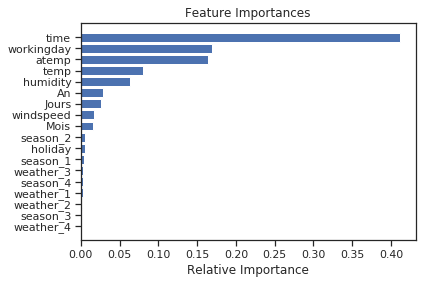

In [77]:
features = X_train_cp.columns
importances = RF_rslt_cp[0][0].feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

__Observation :__
> - A L'issu de ces résultats, il en ressort que l'alogorithme Random Forest fit mieux sur nos données 
> - Nous allons essayer de chercher les hypers paramètres pour améliore le modèle

# RECHERCHE DES HYPERS PARAMETRES POUR LE RANDOM FOREST

In [78]:
model = RandomForestRegressor(random_state=0)

parameters_RF = [{"n_estimators":[10,20,30,40,50,150],
                  "max_features":["auto", "sqrt", "log2"],
                  "max_depth":[2,4,6,8,10,12]}]

In [79]:
# Automatise la recherche de parametres
def hyper_param(type_model,train_X,train_Y):
    model = type_model(random_state=0)

    parameters_RF = [{"n_estimators":[10,20,30,40,50,150],
                  "max_features":["auto", "sqrt", "log2"],
                  "max_depth":[2,4,6,8,10,12],
                  "bootstrap":[True, False]}]
    model_search = GridSearchCV(estimator=model, param_grid=parameters_RF, cv=5, n_jobs=-1)
    grid_model = model_search.fit(train_X, train_Y)
    score_bests = grid_model.best_score_
    bests_params = grid_model.best_params_
    
    return score_bests, bests_params

In [80]:
hyp_params = []
for i in range(Y_train.shape[1]):
    print (i)
    hyp_params.append(hyper_param(type_model = RandomForestRegressor,
                   train_X = X_train ,train_Y = Y_train.iloc[:,i].values))

0
1
2


In [81]:
hyp_params

[(0.6906076117991155,
  {'bootstrap': False,
   'max_depth': 12,
   'max_features': 'sqrt',
   'n_estimators': 150}),
 (0.6602361683985303,
  {'bootstrap': True,
   'max_depth': 12,
   'max_features': 'auto',
   'n_estimators': 40}),
 (0.6698541332435273,
  {'bootstrap': True,
   'max_depth': 12,
   'max_features': 'auto',
   'n_estimators': 150})]

In [82]:
elt_param1 = [12,12,12] # max_depth
elt_param2 = ["sqrt","auto","auto"] # max_features
elt_param3 = [150,40,150] # n_estimators    

## Fonction pour l'application des hypers paramètres du Random Forest

In [83]:
def REG_MODELS_HP(type_reg,param1,param2,param3, X_train_set, Y_train_set,X_test_set,Y_test_set):
    if type_reg==LinearRegression:
        model_reg = type_reg(normalize = True)
    else:
        model_reg = type_reg(bootstrap = True,max_depth = param1,max_features = param2,n_estimators = param3)
    model_reg.fit(X_train_set, Y_train_set)
        # Prediction
    pred_reg = np.round(model_reg.predict(X_test_set),0)
    # Garder que la partie entiere du resultat
    pred_reg_int = []
    for i in range(len(pred_reg)):
        pred_reg_int.append(int(pred_reg[i]))
        
    pred_reg_int_df = pd.DataFrame(pred_reg_int)
    pred_reg_int_df = abs(pred_reg_int_df)
    # Calcul de score 
    r2_reg = round(r2_score(Y_test_set.as_matrix(),pred_reg_int_df),2)
    #-------- convert numpyfloat64 to float ----------#
    r2_reg_f = float(r2_reg)
    # calcum du RMSD
    msd_model = mean_squared_error(Y_test_set, pred_reg_int_df)
    rmsd_model = math.sqrt(msd_model)
    return (model_reg, pred_reg_int_df, r2_reg_f,rmsd_model)

## Application des hypers paramètres du random Forest

In [84]:
#----------- DONNEES INITIALES -------------------#
RF_rslt_i_hp = []
for j in range(Y_train.shape[1]):
    #print(j)
    RF_rslt_i_hp.append(REG_MODELS_HP(type_reg = RandomForestRegressor,
                param1 = elt_param1[i], param2 = elt_param2[i], 
                param3 = elt_param3[i],
                 X_train_set = X_train, 
                 Y_train_set = Y_train.iloc[:,j],
                 X_test_set =  X_test,
                 Y_test_set = Y_test.iloc[:,j]))

#----------- DONNEES SANS LES 3 PREMIERS MOIS -------------------#
RF_rslt_cp_hp = []
for j in range(Y_train_cp.shape[1]):
    RF_rslt_cp_hp.append(REG_MODELS_HP(type_reg = RandomForestRegressor,
                 param1 = elt_param1[i], param2 = elt_param2[i], 
                 param3 = elt_param3[i],
                 X_train_set = X_train_cp, 
                 Y_train_set = Y_train_cp.iloc[:,j],
                 X_test_set =  X_test_cp,
                 Y_test_set = Y_test_cp.iloc[:,j]))
    
#----------- DONNEES INITIALES AVEC VARIABLES ARTIFICIELLES -------#

RF_rslt_i_va_hp = []
for j in range(Y_train.shape[1]):
    RF_rslt_i_va_hp.append(REG_MODELS_HP(type_reg = RandomForestRegressor,
                 param1 = elt_param1[i], param2 = elt_param2[i], 
                 param3 = elt_param3[i],
                 X_train_set = X_train_va, 
                 Y_train_set = Y_train.iloc[:,j],
                 X_test_set =  X_test_va,
                 Y_test_set = Y_test.iloc[:,j]))
    
#----------- DONNEES SANS LES 3 PREMIERS MOIS  AVEC VARIABLES ARTIFICIELLES -----------------#
RF_rslt_cp_va_hp = []
for j in range(Y_train.shape[1]):
    RF_rslt_cp_va_hp.append(REG_MODELS_HP(type_reg = RandomForestRegressor,
                 param1 = elt_param1[i], param2 = elt_param2[i], 
                 param3 = elt_param3[i],
                 X_train_set = X_train_va_cp, 
                 Y_train_set = Y_train_cp.iloc[:,j],
                 X_test_set =  X_test_va_cp,
                 Y_test_set = Y_test_cp.iloc[:,j]))


/home/sidy/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


## Fonction pour calculer le score (coefficient de détermination)

In [85]:
def keep_score_hp(rslt1,rslt2,rslt3,rslt4):
    nom_reg = ["INITIAL", "COMPLET", "INITIAL_VA","COMPLET_VA"]
    coef_dets = []
    for i in range(len(RF_rslt_i)):
        coef_det = pd.DataFrame([rslt1[i][2],rslt2[i][2],rslt3[i][2],rslt4[i][2]])
        coef_dets.append(coef_det)

    coef_dets_df = pd.concat(coef_dets, axis=1).transpose()
    coef_dets_df.columns = [nom_reg[0], nom_reg[1], nom_reg[2],nom_reg[3]]
    coef_dets_df.index = ["casual","registered","count"]
    return coef_dets_df

In [86]:
coef_det = keep_score_hp(rslt1 = RF_rslt_i_hp,
              rslt2 = RF_rslt_cp_hp ,
              rslt3 = RF_rslt_i_va_hp,
              rslt4 = RF_rslt_cp_va_hp)
print(coef_det)

            INITIAL  COMPLET  INITIAL_VA  COMPLET_VA
casual         0.79     0.82        0.80        0.81
registered     0.92     0.92        0.92        0.92
count          0.91     0.90        0.92        0.91


# PREDICTION DU SET DE KAGGLE

In [87]:
pred_test_kaggle_casual_i = np.round(RF_rslt_i[0][0].predict(kaggle_test_i),0) # predire les casual
pred_test_kaggle_casual_i_df = pd.DataFrame(pred_test_kaggle_casual_i)

pred_test_kaggle_registered_i = np.round(RF_rslt_i[1][0].predict(kaggle_test_i),0)# predire les regsitered
pred_test_kaggle_registered_i_df = pd.DataFrame(pred_test_kaggle_registered_i)

## Récupèrer que la partie entière des valeurs de prédiction

In [88]:
#--------------------- Pour les casual ------------------#
pred_casual_int = []
for i in range(len(pred_test_kaggle_casual_i_df)):
    pred_casual_int.append(int(pred_test_kaggle_casual_i_df[0][i]))
pred_casual_int_df = pd.DataFrame(pred_casual_int) 

#---------------- Pour les Registered ---------------------------------#
pred_registerd_int = []
for i in range(len(pred_test_kaggle_registered_i_df)):
    pred_registerd_int.append(int(pred_test_kaggle_registered_i_df[0][i]))
pred_registerd_int_df = pd.DataFrame(pred_registerd_int) 

## Somme des prédictions : count

In [89]:
casual_registered = pred_casual_int_df + pred_registerd_int_df
casual_registered_count_pred = pd.concat([pred_casual_int_df,pred_registerd_int_df,casual_registered], axis=1)

In [90]:
submission = casual_registered
submission['datetime'] = kaggle_test.index
submission.rename(columns={0: "count"}, inplace = True)
name_column = ["datetime","count"]
submission = submission[name_column]

#submission.to_csv("submission.csv", sep=",")

In [91]:
submission.head()

datetime  count
0  2011-01-20 00:00:00     13
1  2011-01-20 01:00:00      5
2  2011-01-20 02:00:00      4
3  2011-01-20 03:00:00      3
4  2011-01-20 04:00:00      3